## Phase 3 Project
* John KIoko Mutuku

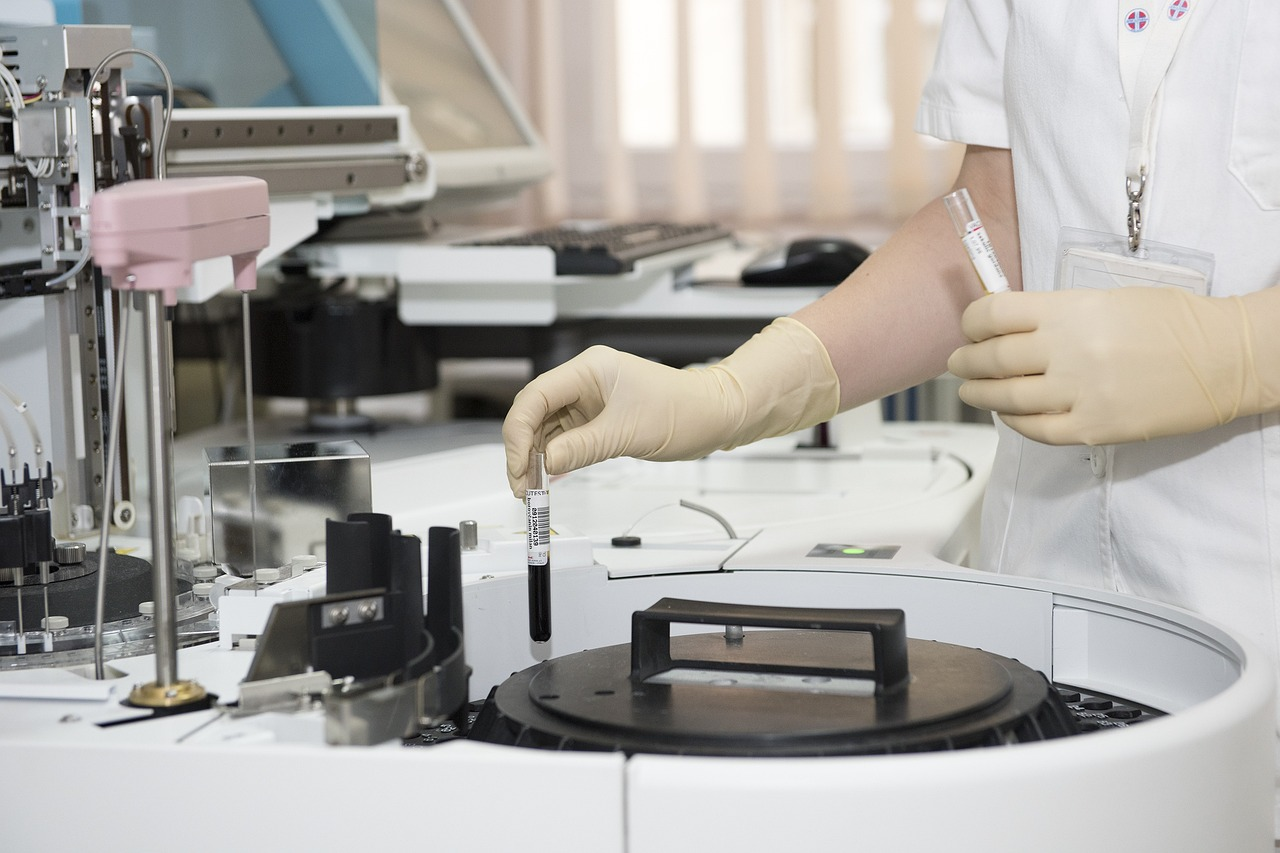

In [1]:
from IPython.display import Image, display

display(Image(filename='Flu_Images/flu_lab.jpg', embed=True))

## BUSINESS UNDERSTANDING
INTRODUCTION
This data-driven project focuses on predicting H1N1 vaccine uptake by employing advanced analytics and machine learning. The goal is to understand and influence factors affecting vaccine acceptance amidst evolving public health challenges. The project utilizes diverse variables such as demographics and health opinions, employing techniques like exploratory data analysis, feature engineering, and machine learning algorithms like logistic regression and decision trees. The objective is not just accurate predictions but actionable insights to improve vaccination coverage and strengthen public health initiatives, blending quantitative analytics with advocacy for proactive healthcare strategies.

## PROBLEM STATEMENT
Recent flu outbreaks, including COVID-19, H1N1, and H5N1, underscore the global health impact of flu. Despite effective vaccines, low vaccination rates persist in the US, averaging 57.8% in 2022 according to CDC estimates. To address this, we aim to investigate reasons behind vaccine hesitancy, focusing on understanding key factors influencing opinions, perceptions, and behaviors related to flu vaccination.

## OBJECTIVES AND GOALS
This data science project aims to develop a predictive model to assess H1N1 and Seasonal flu vaccine likelihood based on demographics and attitudes. Factors considered include opinions, demographics (age, education, employment, income), behaviors (handwashing, masking, crowd avoidance), and the influence of doctors' recommendations. The objective is to analyze these factors and provide insights into individuals' decision-making on flu vaccination, enabling targeted strategies by governments and healthcare organizations to enhance vaccination rates and public health outcomes

## DATA UNDERSTANDING

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [3]:
!pip install tabulate

### DATA EXPLORATION
Loading data Into Dataframes

In [4]:
# Loading the characteristics of the respondents
data_1 = pd.read_csv("Flu_Datasets/training_set_features (1).csv")
data_1.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [5]:
# Load dataset indicating H1N1 and seasonal flu vaccine status
data_2 = pd.read_csv("Flu_Datasets/training_set_labels.csv")
data_2.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


From the two datasets (data_1 and data_2) it is recommended that we merge the two datasets inorder to have a detailed and a more comprehensive dataset with both features and target variables.

In [6]:
# Merging the two dataframes data_1 and data_2
combined_data = pd.merge(data_1, data_2, on="respondent_id")
combined_data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


Exploring the Newly Created Datafarme to get an overview

In [7]:
# Getting Information about the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
# Checking the summary Statistics
combined_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
# Checking the shape of the dataframe
combined_data.shape

(26707, 38)

#### Data Understanding
Since our combined dataset has various columns it is important to understand each column and what they represent. It was therefore important to create a document that contained the columns description.
The Description file helps us understand more about the dataset.

In [10]:
# Accessing the columns 
Description = pd.read_csv("Flu_Datasets/Flu Dataset features mening.csv", encoding="latin1")
Description

,Col_name,Description
0,seasonal_vaccine,Whether respondent received seasonal flu vacci...
1,h1n1_vaccine,Whether respondent received H1N1 flu vaccine. ...
2,respondent_id,Unique and random identifier.
3,h1n1_concern,Level of concern about the H1N1 flu.(0 = Not ...
4,h1n1_knowledge,Level of knowledge about H1N1 flu.(0 = No kno...
5,behavioral_antiviral_meds,Has taken antiviral medications. (binary)
6,behavioral_avoidance,Has avoided close contact with others with fl...
7,behavioral_face_mask,Has bought a face mask. (binary)
8,behavioral_wash_hands,Has frequently washed hands or used hand sani...
9,behavioral_large_gatherings,Has reduced time at large gatherings. (binary)


## DATA PREPARATION
Missing Values

In [11]:
# Checking for Missing values
combined_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

We will drop the columns with the highest missing values
1. health_insurance
2. employment_industry
3. employment_occuptaion

In [12]:
# Dropping the columns with the highest missing values
combined_data.drop(['health_insurance', 'employment_occupation', 'employment_industry'], axis=1, inplace=True)
combined_data.isnull().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Further Handling of missing values

In [13]:
# Filling missing values for numeric datatypes with Median 
numeric_cols = combined_data.select_dtypes(exclude='object').columns
combined_data[numeric_cols] = combined_data[numeric_cols].fillna(combined_data[numeric_cols].median())

In [14]:
# Filling missing values for Object Datatypes with Mode
object_cols = combined_data.select_dtypes(include='object').columns
combined_data[object_cols] = combined_data[object_cols].fillna(combined_data[object_cols].mode().iloc[0])
# The .mode().iloc[0] is used to handle cases where a column has multiple modes.

In [15]:
# Checking Remaining Missing Values
combined_data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Duplicate Values

In [16]:
# Checking for Duplicate Values
combined_data.duplicated().sum()

0

There are no Duplicated values in our dataset

For the purposes of EDA we will create a copy of our dataset inorder to transform the data into different data types to suite the EDA process

In [17]:
# Creating copies from our original dataset
eda_data = combined_data.copy()

# confirming if they are equal
eda_data == combined_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26703,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26704,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
26705,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
eda_data

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0,0


In [19]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

Data Mapping - We will Map the region column to suit our objectives in terms of the Demographic background analysis

In [20]:
# Classifying the region column into appropriate groups by using Mapping

hhs_geo_region = {"hhs_geo_region": {"lzgpxyit": "Town A", "fpwskwrf": "Town B", "qufhixun": "Town C",
                                     "oxchjgsf": "Town D", "kbazzjca": "Town E",
                                     "bhuqouqj": "Town F", "mlyzmhmf": "Town G",
                                     "lrircsnp": "Town H", "atmpeygn": "Town I", "dqpwygqj": "Town J"}}

eda_data = eda_data.replace(hhs_geo_region)

In [21]:
# Confirming whether the region column has effected the Mapping
print(eda_data['hhs_geo_region'].unique())

['Town D' 'Town F' 'Town C' 'Town H' 'Town I' 'Town A' 'Town B' 'Town G'
 'Town J' 'Town E']


Data Transformation - This is done to make data more interpretable and user-friendly
In the below we will transform the opinion columns because it is a requirement from our objectives 

In [22]:
# opinion_h1n1_vacc_effective

eda_data.opinion_h1n1_vacc_effective = eda_data.opinion_h1n1_vacc_effective.replace({
    1: "Not at all effective",
    2: "Not very effective",
    3: "Don't know",
    4: "Somewhat effective",
    5: "Very effective"
})

In [23]:
# opinion_h1n1_risk

eda_data.opinion_h1n1_risk = eda_data.opinion_h1n1_risk.replace({
    1: "Very Low",
    2: "Somewhat low",
    3: "Don't know",
    4: "Somewhat high",
    5: "Very high"
})

In [24]:
# opinion_seas_vacc_effective

eda_data.opinion_seas_vacc_effective = eda_data.opinion_seas_vacc_effective.replace({
    1: "Not at all effective",
    2: "Not very effective",
    3: "Don't know",
    4: "Somewhat effective",
    5: "Very effective"
})

In [25]:
# opinion_h1n1_sick_from_vacc

eda_data.opinion_h1n1_sick_from_vacc = eda_data.opinion_h1n1_sick_from_vacc.replace({
    1: "Not at all worried",
    2: "Not very worried",
    3: "Don't know",
    4: "Somewhat worried",
    5: "Very worried"
})

In [26]:
# opinion_seas_risk

eda_data.opinion_seas_risk = eda_data.opinion_seas_risk.replace({
    1: "Very Low",
    2: "Somewhat low",
    3: "Don't know",
    4: "Somewhat high",
    5: "Very high"
})

In [27]:
# opinion_seas_sick_from_vacc

eda_data.opinion_seas_sick_from_vacc = eda_data.opinion_seas_sick_from_vacc.replace({
    1: "Not at all worried",
    2: "Not very worried",
    3: "Don't know",
    4: "Somewhat worried",
    5: "Very worried"
})

### EXPLORATORY DATA ANALYSIS
Univariate Analysis

Text(0.5, 1.0, 'Distribution of Education groups')

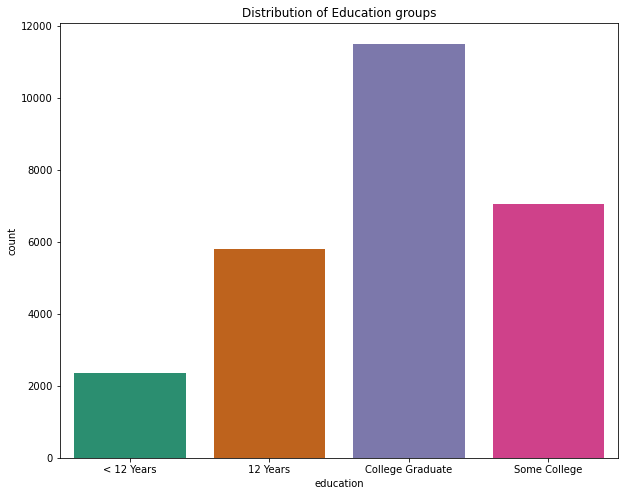

In [28]:
# Distribution of Education groups
plt.figure(figsize=(10, 8))
sns.countplot(x="education", data=eda_data, palette='Dark2')
plt.title("Distribution of Education groups")

>Most vaccine intake is seen on college graduates respondents

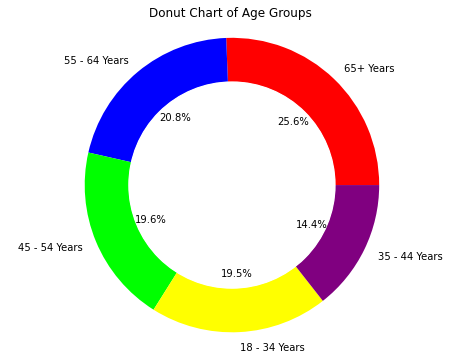

In [29]:
# Checking the distribution in the Age column

# Define the colors for each category
colors = ['#FF0000', '#0000FF', '#00FF00', '#FFFF00', '#800080']

# Get the count of each category
category_count = eda_data['age_group'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_count, labels=category_count.index, colors=colors, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Age Groups')

# Create a white circle in the middle for the donut effect
centre_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

> Most of the respondents were older than 65 years.

Text(0.5, 1.0, 'Race Distribution')

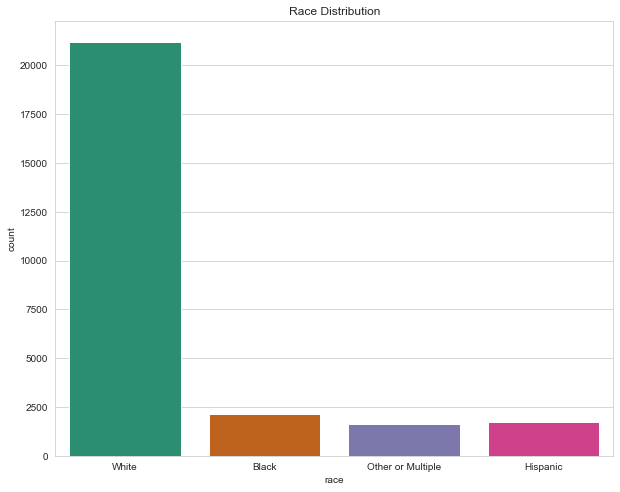

In [30]:
# Checking the distribution in the Age column

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.countplot(x="race", data=eda_data, palette='Dark2')
plt.title("Race Distribution")

> Most respondents were white caucasians

Text(0.5, 1.0, 'Distribution of Gender')

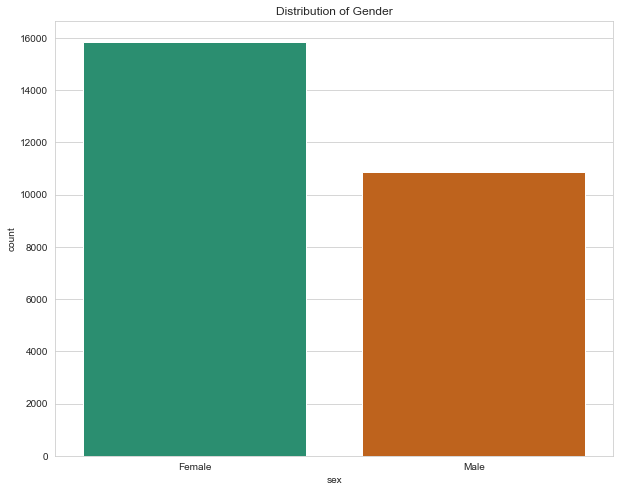

In [31]:
# Checking the distribution in the Gender column
# Set the style
sns.set_style("whitegrid")

# Create the count plot with a specific palette
plt.figure(figsize=(10, 8))
sns.countplot(x="sex", data=eda_data, palette='Dark2')
plt.title("Distribution of Gender")

> Most respondents were female

Text(0.5, 1.0, 'Distribution of income classes')

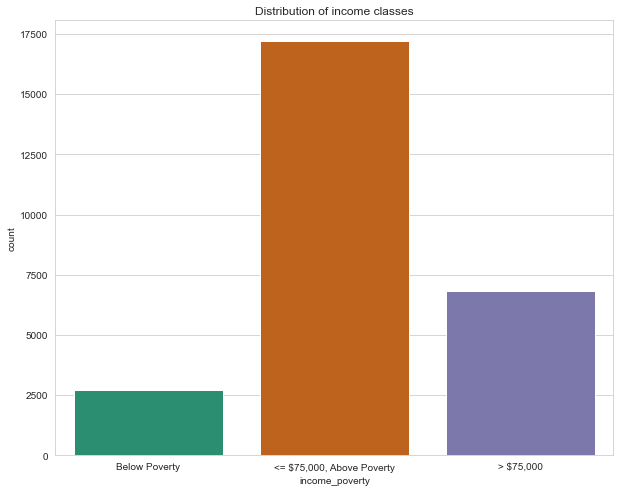

In [32]:
#Distribution of income classes
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "income_poverty", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of income classes")

> Most respondents were above the income poverty line

Text(0.5, 1.0, 'Distribution of marital status')

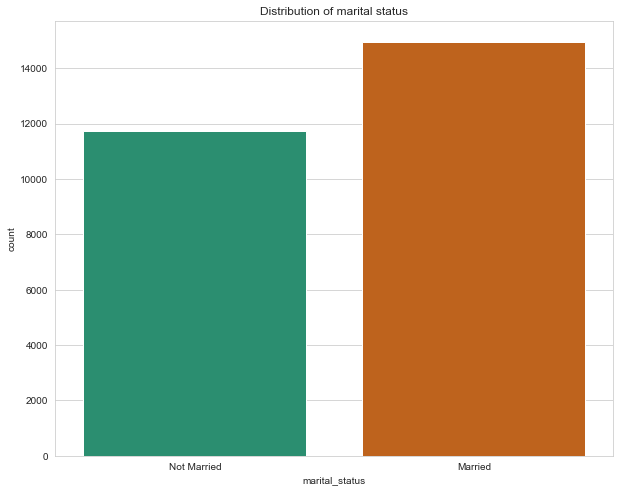

In [33]:
#Distribution of marital status
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "marital_status", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of marital status")

> Most respondents were married

Text(0.5, 1.0, 'Distribution of renters and owners')

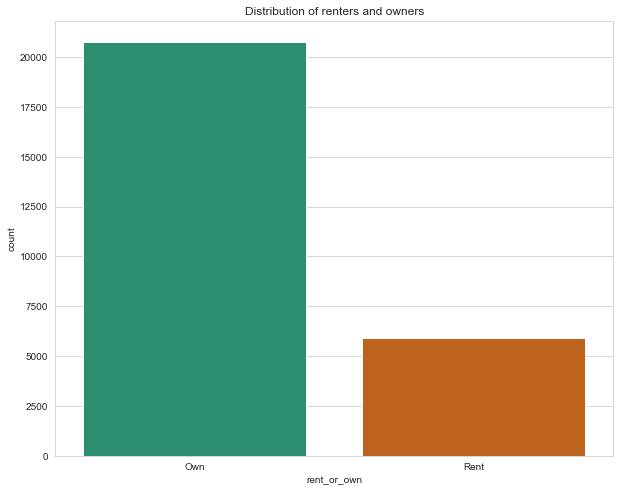

In [34]:
#Distribution of house situation
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "rent_or_own", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of renters and owners")

Text(0.5, 1.0, 'Distribution of census metropolitan Statistical Area')

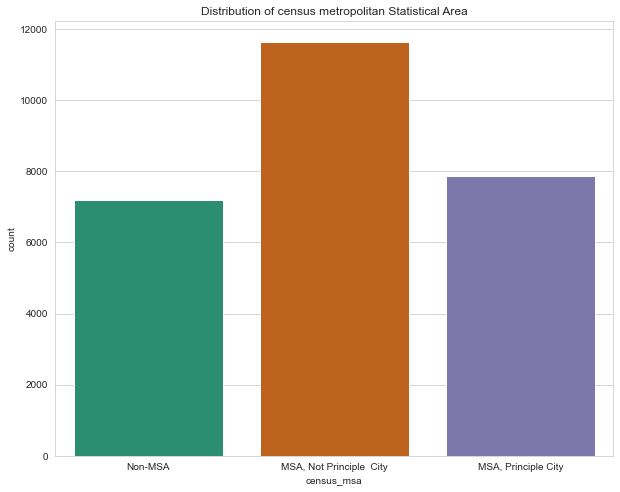

In [35]:
#Distribution of census metropolitan Statistical Area
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "census_msa", data = eda_data ,palette = 'Dark2')
plt.title("Distribution of census metropolitan Statistical Area")

> Most respondents live around MSA

Text(0.5, 1.0, 'Count-plot of Opinion on H1N1 Vaccine Effectiveness')

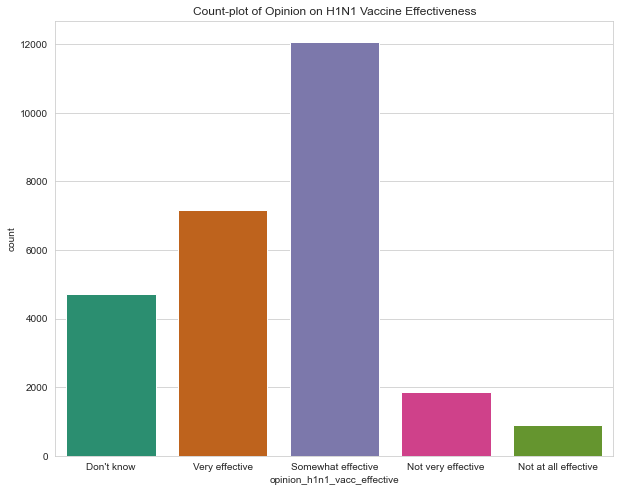

In [36]:
# # Checking the distribution in the Vaccine Effectiveness for h1n1 column
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.countplot(x='opinion_h1n1_vacc_effective', data = eda_data, palette='Dark2')
plt.title('Count-plot of Opinion on H1N1 Vaccine Effectiveness')

> Most people voted for h1n1 vaccine as somewhat effective

Text(0.5, 1.0, 'Count-plot of Opinion on Seasonal Vaccine Effectiveness.')

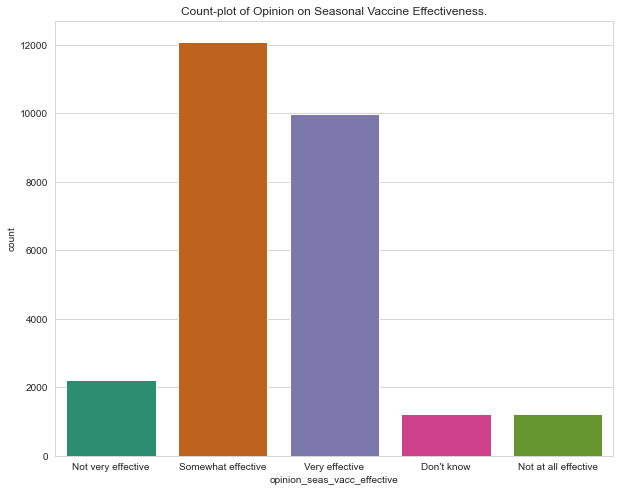

In [37]:
# Checking the distribution in the Vaccine Effectiveness for Seasonal Vaccine column
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "opinion_seas_vacc_effective", data = eda_data ,palette = 'Dark2')

plt.title("Count-plot of Opinion on Seasonal Vaccine Effectiveness.")

> The prevailing sentiment among the majority of individuals is that seasonal vaccines are perceived as "somewhat effective." This is closely followed by those who express the view that the vaccine is "very effective."

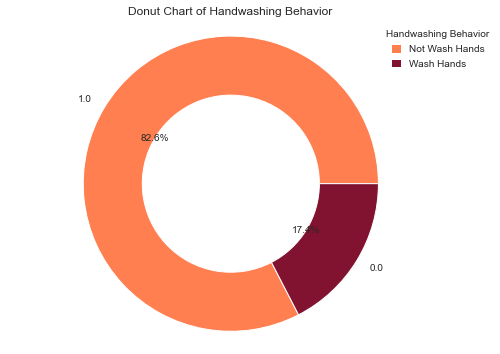

In [38]:
# Checking the distribution in the Hand-washing Behavior column

# Define the colors for each category
colors = ['#FF7F50', '#811331']

# Get the count of each category
category_count = combined_data['behavioral_wash_hands'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(category_count, labels=category_count.index, autopct='%1.1f%%',
       colors=colors, wedgeprops=dict(width=0.4))

# Draw a white circle at the center to create the donut shape
center_circle = plt.Circle((0, 0), 0.3, color='white')
ax.add_artist(center_circle)

# Create a legend
legend_labels = ['Not Wash Hands', 'Wash Hands']
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1),
          title='Handwashing Behavior', labels=legend_labels,
          handlelength=1, handleheight=1, edgecolor='none',
          facecolor='none', framealpha=0.7)

# Set the aspect ratio to be equal for a circular donut chart
ax.axis('equal')

# Set the title
plt.title('Donut Chart of Handwashing Behavior')

# Show the plot
plt.show()

The analysis reveals that an overwhelming majority, approximately 82.6% of individuals in our dataset, refrain from washing their hands.

Text(0.5, 1.0, 'Distribution of h1n1 vaccine.')

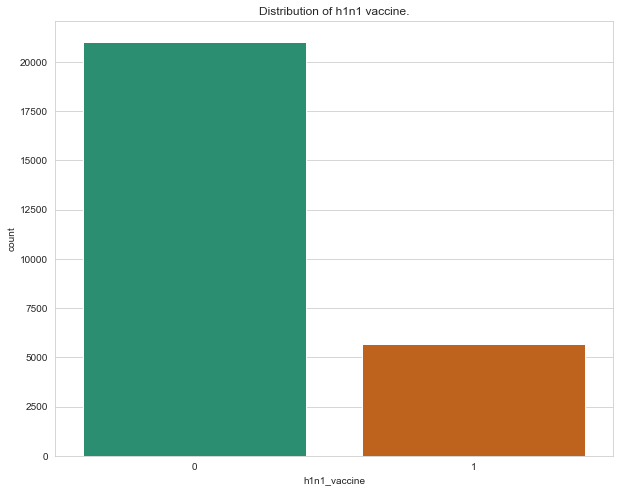

In [39]:
#Distribution of h1n1 vaccine.
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "h1n1_vaccine", data = eda_data ,palette = 'Dark2')

plt.title("Distribution of h1n1 vaccine.")

Text(0.5, 1.0, 'Distribution of seasonal flu vaccine')

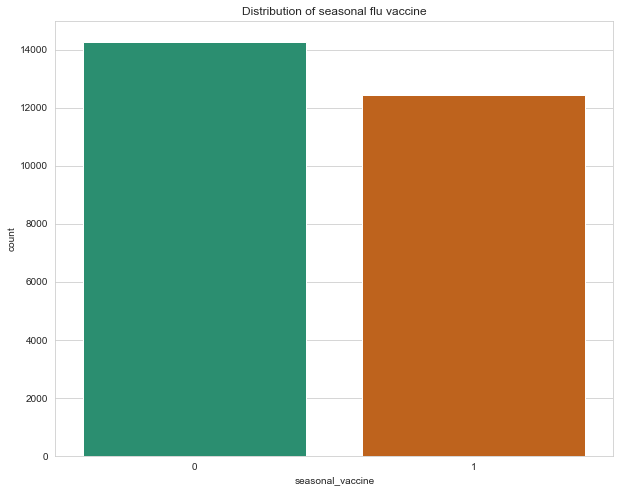

In [40]:
#Distribution of seasonal flu vaccine
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.countplot(x= "seasonal_vaccine", data = eda_data ,palette = 'Dark2')

plt.title("Distribution of seasonal flu vaccine")

> As seen , the seasonal flu vaccine has a balanced classes compared to the h1n1 flu vaccine 

Multivariate Analysis

Text(0.5, 1.0, 'Relation of the concern one has about the virus and getting vaccinated.')

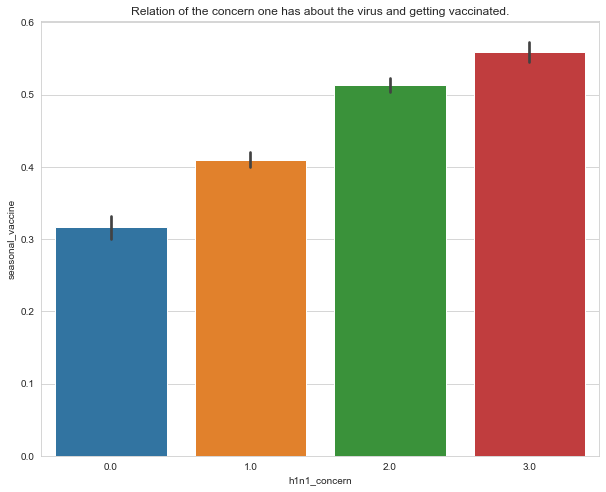

In [41]:
# relation between the concern one has about the virus and getting vaccinated

sns.set_style("whitegrid")

bar, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= eda_data, x="h1n1_concern", y="seasonal_vaccine")

plt.title("Relation of the concern one has about the virus and getting vaccinated.")

> As seen from the chart, the people who are mostly concerned with the virus are likely to get the seasonal flu vaccine

Text(0.5, 1.0, 'Relation of the age group and getting vaccinated.')

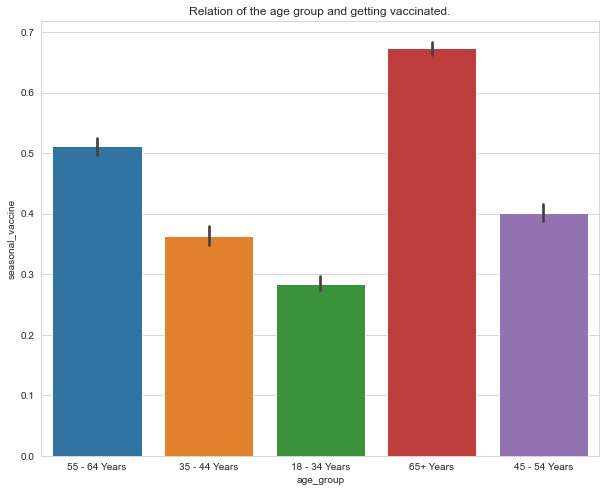

In [42]:
# relation between the age group and getting vaccinated
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(data=eda_data, x="age_group", y="seasonal_vaccine")

plt.title("Relation of the age group and getting vaccinated.")

> From the above chart, people who are over 65 have received seasonal flu vaccine

Text(0.5, 1.0, 'Relation of having a chronic medical condition and getting vaccinated.')

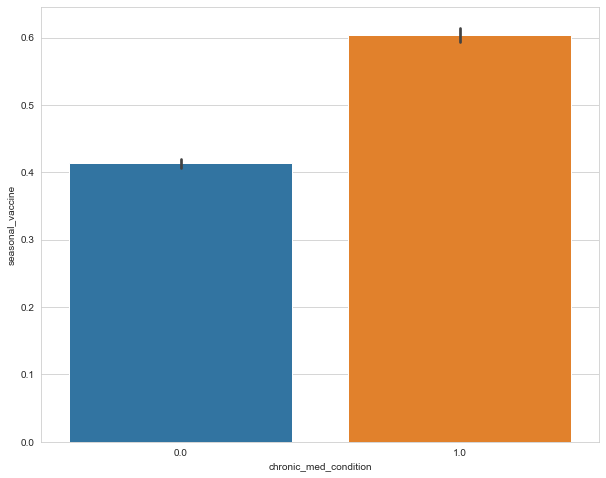

In [43]:
#relation between one having a chronic medical condition and getting vaccinated
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.barplot(data= eda_data, x="chronic_med_condition",y="seasonal_vaccine")

ax.set_title("Relation of having a chronic medical condition and getting vaccinated.")

> People who were believed to have chronic conditions had a higher chance of seasonal flu vaccination

Text(0.5, 1.0, 'Relation of being a health worker and getting vaccinated.')

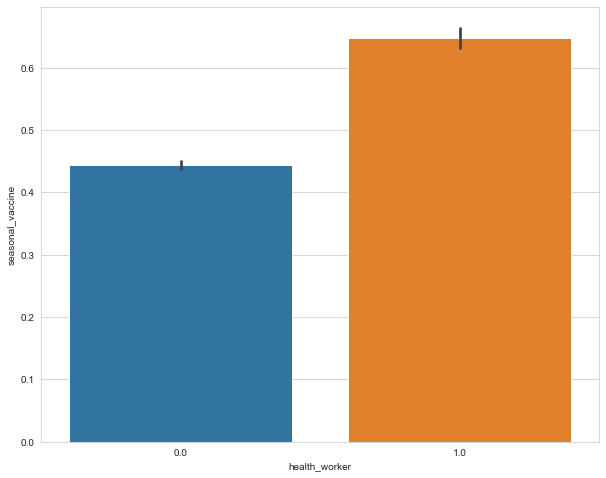

In [44]:
#Relation between being a health worker and getting a seasonal flu vaccine 
sns.set_style("whitegrid")

plt.subplots(figsize=(10,8))
sns.barplot(data=eda_data, x="health_worker",y="seasonal_vaccine")

ax.set_title("Relation of being a health worker and getting vaccinated.")

> People who work in clinical environments had a higher chance of seasonal flu vaccination because of their exposure to diseases

Text(0.5, 1.0, 'Relation between level of education and getting vaccinated.')

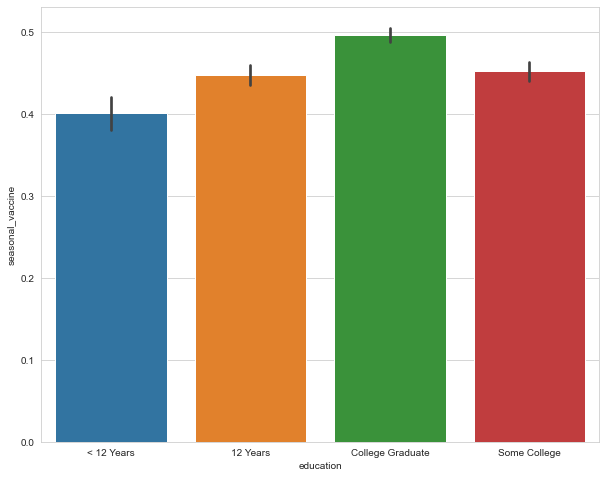

In [45]:
#Relation between level of education and getting a seasonal flu vaccine.
sns.set_style("whitegrid")

plt.subplots(figsize=(10,8))
sns.barplot(data= eda_data, x="education",y="seasonal_vaccine")

ax.set_title("Relation between level of education and getting vaccinated.")

> College graduates indicated a higher chance of getting seasonal flu vaccine

Bi Variate Analysis

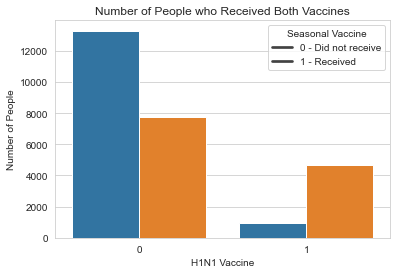

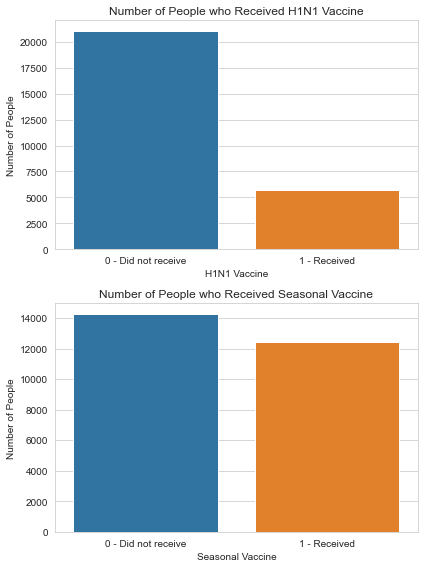

In [46]:
# Step 1: Calculate the count of participants who took each combination of vaccines
vaccine_counts = eda_data.groupby(['h1n1_vaccine', 'seasonal_vaccine']).size().reset_index(name='count')

# Step 2: Create a bar graph for the vaccine combinations
plt.figure(figsize=(6, 4))
sns.barplot(x='h1n1_vaccine', y='count', hue='seasonal_vaccine', data=vaccine_counts)
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Number of People')
plt.title('Number of People who Received Both Vaccines')
plt.legend(title='Seasonal Vaccine', labels=['0 - Did not receive', '1 - Received'])
plt.show()

# Step 3: Create separate bar graphs for each vaccine
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# H1N1 Vaccine
sns.countplot(x='h1n1_vaccine', data=eda_data, ax=axes[0])
axes[0].set_xticklabels(['0 - Did not receive', '1 - Received'])
axes[0].set_xlabel('H1N1 Vaccine')
axes[0].set_ylabel('Number of People')
axes[0].set_title('Number of People who Received H1N1 Vaccine')

# Seasonal Vaccine
sns.countplot(x='seasonal_vaccine', data=eda_data, ax=axes[1])
axes[1].set_xticklabels(['0 - Did not receive', '1 - Received'])
axes[1].set_xlabel('Seasonal Vaccine')
axes[1].set_ylabel('Number of People')
axes[1].set_title('Number of People who Received Seasonal Vaccine')

plt.tight_layout()
plt.show()

> Observation from the above indicates

In [47]:
# Calculate vaccination ratios
ratios = {
    'both_vax': eda_data[(eda_data['h1n1_vaccine']==1) & (eda_data['seasonal_vaccine']==1)].shape[0] / eda_data.shape[0],
    'either_vax': eda_data[(eda_data['h1n1_vaccine']==1) | (eda_data['seasonal_vaccine']==1)].shape[0] / eda_data.shape[0],
    'H1N1': eda_data[eda_data['h1n1_vaccine']==1].shape[0] / eda_data.shape[0],
    'Seasonal': eda_data[eda_data['seasonal_vaccine']==1].shape[0] / eda_data.shape[0],
}

# Print the results
for key, value in ratios.items():
    print(f"Percentage of respondents who received {key.replace('_', ' ')}: {value:.2%}")

Percentage of respondents who received both vax: 17.59%
Percentage of respondents who received either vax: 50.22%
Percentage of respondents who received H1N1: 21.25%
Percentage of respondents who received Seasonal: 46.56%


> This indicates that a higher number of people opt for seasonal flu vaccination

Comparing the Behavioral activities that affect the vaccine intake 

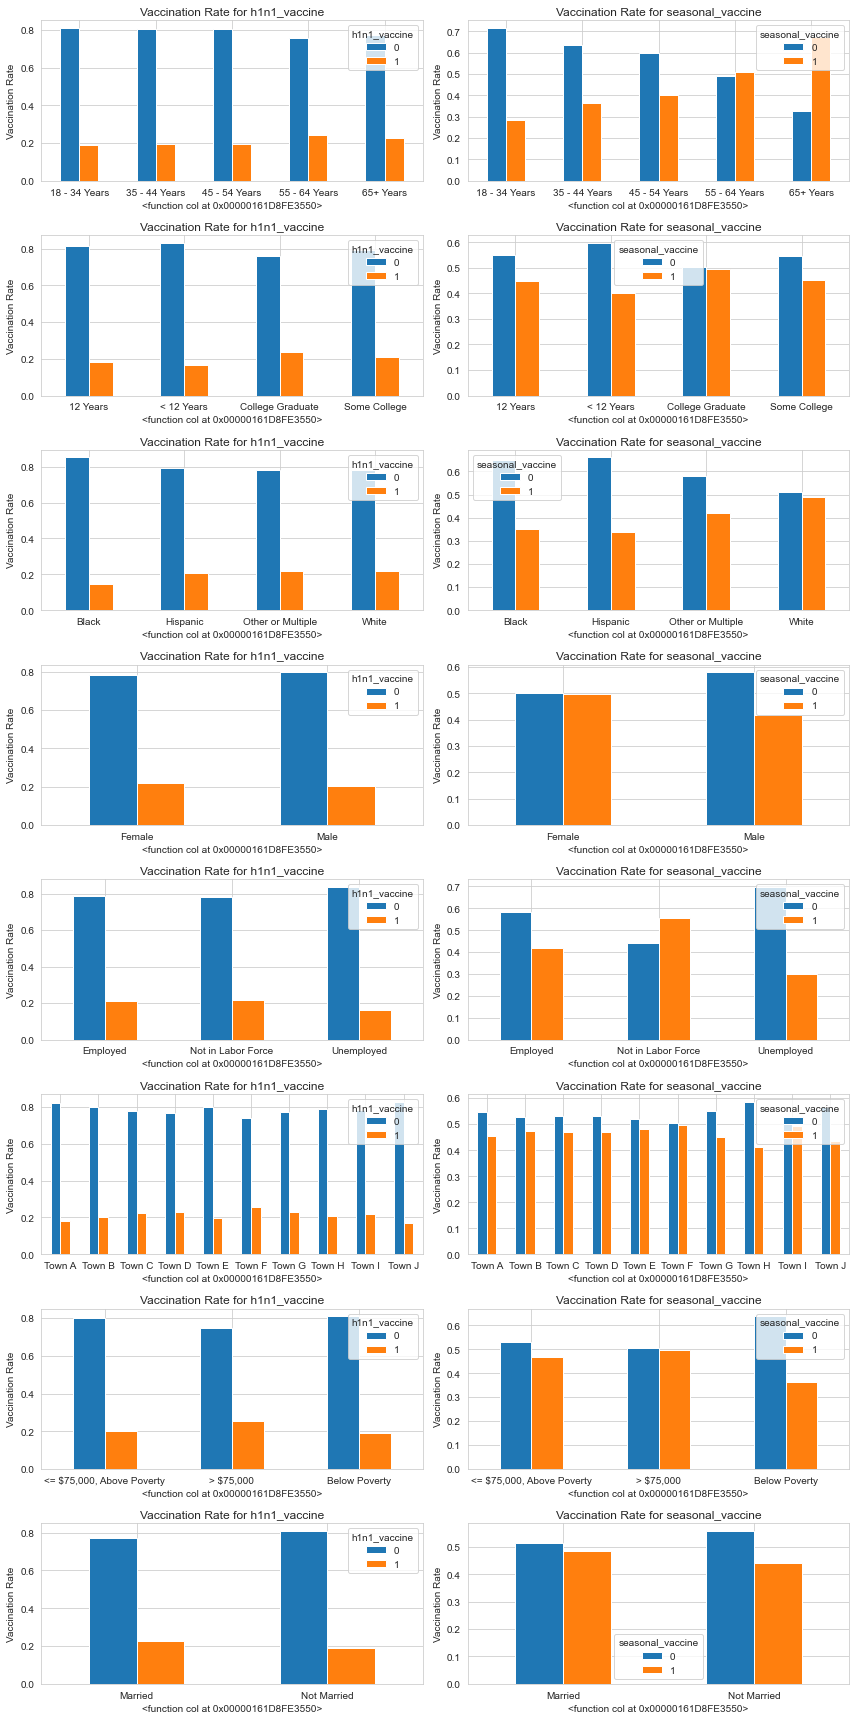

In [48]:
from pyparsing import col


# Comparing the effect of background activities on Vaccine take

def prepare_data(eda_data, target, col):
    """Prepare data for vaccination rate plot."""
    counts = eda_data.groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props

def vaccination_rate_grouped_plot(ax, props, target):
    """Grouped bar chart of vaccination rate."""
    props.plot(kind="bar", ax=ax)
    ax.set_xticklabels(props.index, rotation=0)
    ax.legend(title=target)
    ax.set_xlabel(col)
    ax.set_ylabel('Vaccination Rate')
    ax.set_title(f'Vaccination Rate for {target}')

def plot_vaccination_rates_grouped(eda_data, cols_to_plot):
    """Plot grouped vaccination rates for multiple columns."""
    fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(12, len(cols_to_plot) * 3))
    
    for idx, col in enumerate(cols_to_plot):
        props_h1n1 = prepare_data(eda_data, 'h1n1_vaccine', col)
        props_seasonal = prepare_data(eda_data, 'seasonal_vaccine', col)
        
        vaccination_rate_grouped_plot(ax[idx, 0], props_h1n1, 'h1n1_vaccine')
        vaccination_rate_grouped_plot(ax[idx, 1], props_seasonal, 'seasonal_vaccine')

    fig.tight_layout()

# Example usage
cols_to_plot = ['age_group', 'education', 'race', 'sex', 'employment_status', 'hhs_geo_region', 'income_poverty', 'marital_status']
plot_vaccination_rates_grouped(eda_data, cols_to_plot)
plt.show()

>Observations

>>Age Group
  >H1N1 Vaccine: [Highest vaccination rate in the age group 55-64.] 
  >Seasonal Vaccine: [Highest vaccination rate in the age group 65+.]

>>Education 
  >HiNi Vaccine: [Majority of recipients are college graduates.] 
  >Seasonal Vaccine : [Majority of recipients are college graduates.]

>>Race 
  >H1N1 Vaccine : [Highest vaccination rate among people of Hispanic origin.] 
  >Seasonal Vaccine : [Highest vaccination rate among white individuals.]

>>Sex 
  >H1N1 Vaccine : [Equal proportion of men and women received the vaccine] 
  >Seasonal Vaccine : [Slightly more women received the vaccine than men.]

>>Employment Status 
  >H1N1 Vaccine : [Highest vaccination rate for both H1N1 and Seasonal vaccines among people not in the labor force.] 
  >Seasonal Vaccine : [Highest vaccination rate for both H1N1 and Seasonal vaccines among people not in the labor force.]

>>Geographical Region 
  >H1N1 Vaccine : [People in town F had the highest vaccination rates for both H1N1 and Seasonal vaccines.] 
  >Seasonal Vaccine : [People in town F had the highest vaccination rates for both H1N1 and Seasonal vaccines.]

In [49]:
def prepare_data(eda_data, target, col):
    """Prepare data for vaccination rate print."""
    counts = eda_data.groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props

def print_vaccination_rates(eda_data, cols_to_print):
    """Print vaccination rates for multiple columns."""
    for col in cols_to_print:
        props_h1n1 = prepare_data(eda_data, 'h1n1_vaccine', col)
        props_seasonal = prepare_data(eda_data, 'seasonal_vaccine', col)

        print(f"\nVaccination Rates for {col} (h1n1_vaccine):\n{props_h1n1}")
        print(f"\nVaccination Rates for {col} (seasonal_vaccine):\n{props_seasonal}")

# Example usage
cols_to_print = ['age_group', 'education', 'race', 'sex', 'employment_status', 'hhs_geo_region', 'income_poverty', 'marital_status']
print_vaccination_rates(eda_data, cols_to_print)


Vaccination Rates for age_group (h1n1_vaccine):
h1n1_vaccine          0         1
age_group                        
18 - 34 Years  0.809971  0.190029
35 - 44 Years  0.802235  0.197765
45 - 54 Years  0.805269  0.194731
55 - 64 Years  0.757145  0.242855
65+ Years      0.773345  0.226655

Vaccination Rates for age_group (seasonal_vaccine):
seasonal_vaccine         0         1
age_group                           
18 - 34 Years     0.715436  0.284564
35 - 44 Years     0.637474  0.362526
45 - 54 Years     0.598702  0.401298
55 - 64 Years     0.488765  0.511235
65+ Years         0.326319  0.673681

Vaccination Rates for education (h1n1_vaccine):
h1n1_vaccine             0         1
education                           
12 Years          0.815249  0.184751
< 12 Years        0.832840  0.167160
College Graduate  0.761474  0.238526
Some College      0.792134  0.207866

Vaccination Rates for education (seasonal_vaccine):
seasonal_vaccine         0         1
education                           
12 

> From the above outputs its clear that the seasonal vaccine has a higher vaccine intake from the respondents

Checking the Opinions of the respondents from all the opinions columns 

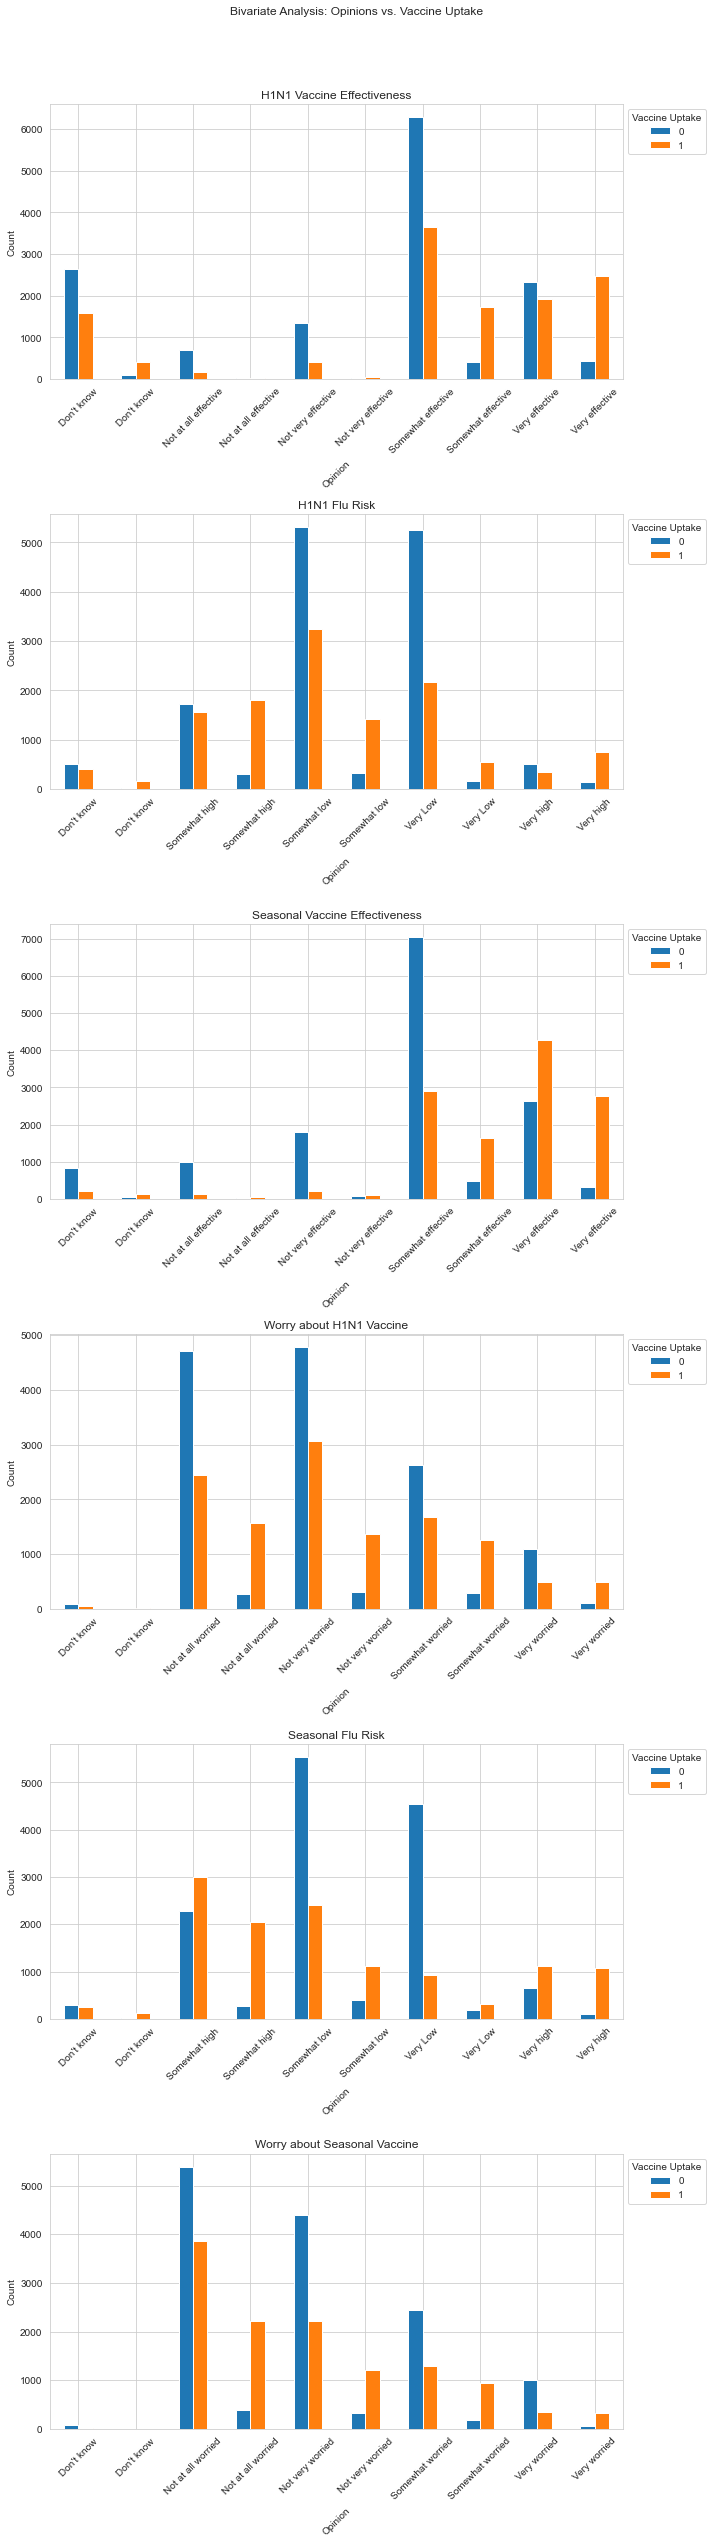

In [50]:
# Comparing the opinions of the respondents on the vaccine uptake

def rename_opinion_columns(eda_data):
    """Rename opinion columns."""
    opinion_columns = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective',
                       'opinion_h1n1_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
    renamed_columns = ['H1N1 Vaccine Effectiveness', 'H1N1 Flu Risk', 'Seasonal Vaccine Effectiveness',
                       'Worry about H1N1 Vaccine', 'Seasonal Flu Risk', 'Worry about Seasonal Vaccine']
    
    df_renamed = eda_data.copy()
    replace_mapping = {
        'opinion_h1n1_vacc_effective': {1: 'Not at all effective', 2: 'Not very effective', 3: "Don't know",
                                        4: 'Somewhat effective', 5: 'Very effective'},
        'opinion_h1n1_risk': {1: 'Very Low', 2: 'Somewhat low', 3: "Don't know",
                              4: 'Somewhat high', 5: 'Very high'},
        'opinion_seas_vacc_effective': {1: 'Not at all effective', 2: 'Not very effective', 3: "Don't know",
                                        4: 'Somewhat effective', 5: 'Very effective'},
        'opinion_h1n1_sick_from_vacc': {1: 'Not at all worried', 2: 'Not very worried', 3: "Don't know",
                                        4: 'Somewhat worried', 5: 'Very worried'},
        'opinion_seas_risk': {1: 'Very Low', 2: 'Somewhat low', 3: "Don't know",
                              4: 'Somewhat high', 5: 'Very high'},
        'opinion_seas_sick_from_vacc': {1: 'Not at all worried', 2: 'Not very worried', 3: "Don't know",
                                        4: 'Somewhat worried', 5: 'Very worried'}
    }

    df_renamed.replace(replace_mapping, inplace=True)
    return df_renamed, opinion_columns, renamed_columns

def plot_opinion_vaccine_relationship_clustered(df_renamed, opinion_columns, renamed_columns):
    """Plot clustered bar charts for opinion vs. vaccine uptake."""
    fig, axes = plt.subplots(len(opinion_columns), 1, figsize=(10, 6*len(opinion_columns)))  # Adjust figsize here
    fig.suptitle('Bivariate Analysis: Opinions vs. Vaccine Uptake')

    for i, ax in enumerate(axes):
        data = df_renamed.groupby([opinion_columns[i], 'h1n1_vaccine', 'seasonal_vaccine']).size().unstack()
        data.plot(kind='bar', ax=ax)
        
        ax.set_xlabel('Opinion')
        ax.set_ylabel('Count')
        ax.set_title(renamed_columns[i])
        ax.legend(title='Vaccine Uptake', bbox_to_anchor=(1, 1), loc='upper left')
        ax.xaxis.label.set_rotation(45)
        ax.set_xticklabels(data.index.get_level_values(0), rotation=45)  # Set x-axis labels to the brief categories

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
df_renamed, opinion_columns, renamed_columns = rename_opinion_columns(eda_data)
plot_opinion_vaccine_relationship_clustered(df_renamed, opinion_columns, renamed_columns)

Observations
>Opinion on H1N1 Vaccine Effectiveness 
    The majority of respondents, regardless of vaccine uptake, rated the H1N1 vaccine as somewhat effective.
    
>Opinion on H1N1 Risk
    Most respondents perceived the risk of getting sick with H1N1 flu without the vaccine as somewhat low, irrespective of their vaccine choices.
    
>Opinion on Seasonal Vaccine Effectiveness
    Respondents who considered the seasonal vaccine somewhat effective were less likely to take the H1N1 vaccine. *The majority of people who rated the seasonal vaccine as very effective also took the H1N1 vaccine. *Those who were unsure or believed the seasonal vaccine to be not at all effective had lower uptake of the seasonal vaccine.
    
>Worry about Getting Sick from H1N1 Vaccine
    The highest H1N1 vaccine uptake was observed among respondents who expressed little to no worry about getting sick from taking the H1N1 vaccine. *Those who were unsure about their worries did not take either vaccine.
    
>Opinion on Seasonal Flu Risk
    Respondents who perceived the risk of getting sick with seasonal flu without the vaccine as somewhat low were less likely to take either vaccine. *Those who considered the risk somewhat high were more inclined to take the H1N1 vaccine.
    
>Worry about Getting Sick from Seasonal Vaccine
    Respondents who were not worried at all about getting sick from the seasonal vaccine had the highest H1N1 vaccine uptake. *Those who were unsure about their worries had the lowest uptake of either vaccine.

Comparing how health behaviors affect vaccine uptake

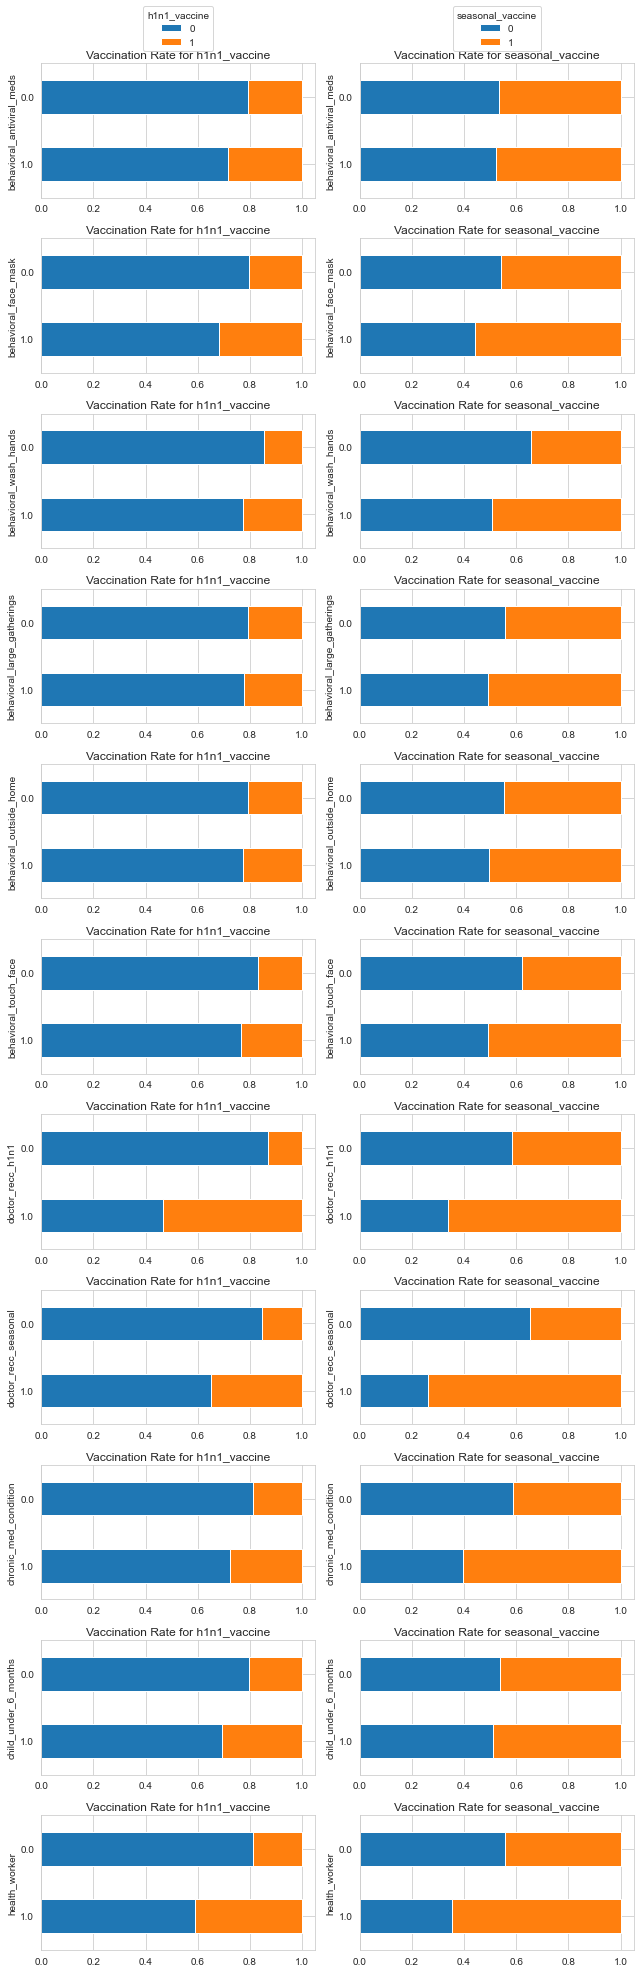

In [51]:
def prepare_data(eda_data, target, col):
    """Prepare data for vaccination rate plot."""
    counts = eda_data.groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props

def vaccination_rate_plot(ax, props, target):
    """Stacked bar chart of vaccination rate."""
    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()
    ax.set_title(f'Vaccination Rate for {target}')

def plot_vaccination_rates(eda_data, cols_to_plot):
    """Plot vaccination rates for multiple columns."""
    fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot) * 2.5))
    
    for idx, col in enumerate(cols_to_plot):
        props_h1n1 = prepare_data(eda_data, 'h1n1_vaccine', col)
        props_seasonal = prepare_data(eda_data, 'seasonal_vaccine', col)
        
        vaccination_rate_plot(ax[idx, 0], props_h1n1, 'h1n1_vaccine')
        vaccination_rate_plot(ax[idx, 1], props_seasonal, 'seasonal_vaccine')

    ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
    ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
    fig.tight_layout()
    
# Example usage
cols_to_plot = [
    "behavioral_antiviral_meds" ,"behavioral_face_mask" ,"behavioral_wash_hands" ,
    "behavioral_large_gatherings" ,"behavioral_outside_home", "behavioral_touch_face" ,
    "doctor_recc_h1n1" , "doctor_recc_seasonal" , "chronic_med_condition" , "child_under_6_months" ,
    "health_worker"
]

plot_vaccination_rates(eda_data, cols_to_plot)
plt.show()

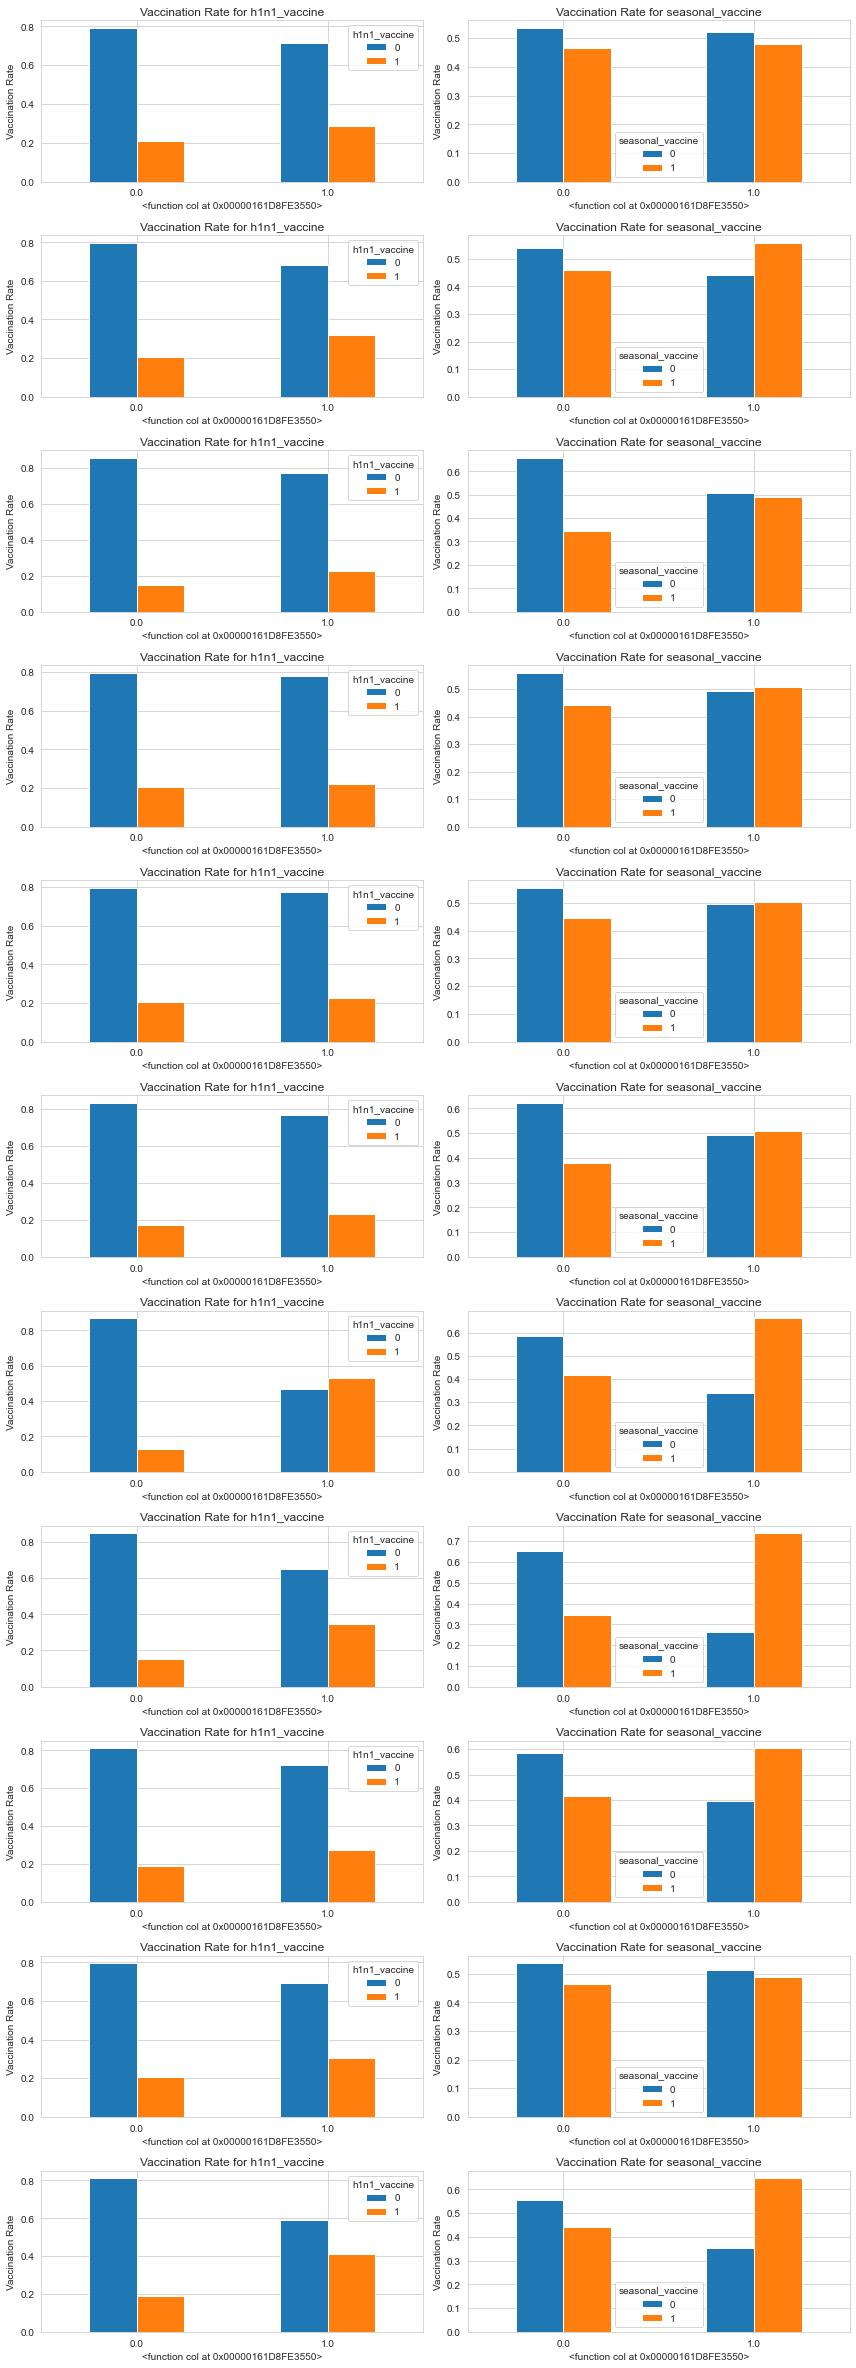

In [52]:
# Checking on the health behaviours that affect Vaccine Intake
def prepare_data(eda_data, target, col):
    """Prepare data for vaccination rate plot."""
    counts = eda_data.groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    return props

def vaccination_rate_grouped_plot(ax, props, target):
    """Grouped bar chart of vaccination rate."""
    props.plot(kind="bar", ax=ax)
    ax.set_xticklabels(props.index, rotation=0)
    ax.legend(title=target)
    ax.set_xlabel(col)
    ax.set_ylabel('Vaccination Rate')
    ax.set_title(f'Vaccination Rate for {target}')

def plot_vaccination_rates_grouped(df, cols_to_plot):
    """Plot grouped vaccination rates for multiple columns."""
    fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(12, len(cols_to_plot) * 3))
    
    for idx, col in enumerate(cols_to_plot):
        props_h1n1 = prepare_data(eda_data, 'h1n1_vaccine', col)
        props_seasonal = prepare_data(eda_data, 'seasonal_vaccine', col)
        
        vaccination_rate_grouped_plot(ax[idx, 0], props_h1n1, 'h1n1_vaccine')
        vaccination_rate_grouped_plot(ax[idx, 1], props_seasonal, 'seasonal_vaccine')

    fig.tight_layout()

# Example usage
cols_to_plot = [
    "behavioral_antiviral_meds" ,"behavioral_face_mask" ,"behavioral_wash_hands" ,
    "behavioral_large_gatherings" ,"behavioral_outside_home", "behavioral_touch_face" ,
    "doctor_recc_h1n1" , "doctor_recc_seasonal" , "chronic_med_condition" , "child_under_6_months" ,
    "health_worker"
]

plot_vaccination_rates_grouped(eda_data, cols_to_plot)
plt.show()

Observation
behavioral_antiviral_meds: Those who opted for antiviral medications predominantly chose to get vaccinated.

behavioral_face_mask: A significant number of individuals who invested in face masks also chose to receive the vaccine.

behavioral_wash_hands: The majority of those who frequently washed hands or used hand sanitizer also took the vaccine.

behavioral_large_gatherings: Those who reduced their time at large gatherings tended to have a higher vaccine uptake.

behavioral_outside_home: Individuals who minimized contact with people outside their households showed a higher vaccine uptake.

behavioral_touch_face: Those who actively avoided touching their eyes, nose, or mouth had a higher vaccine uptake.

doctor_recc_h1n1: A substantial majority of individuals whose doctors recommended the H1N1 flu vaccine followed through and took it.

doctor_recc_seasonal: Similarly, most individuals who received a doctor's recommendation for the seasonal flu vaccine chose to get vaccinated.

chronic_med_condition: The vaccine uptake was notably higher among individuals with chronic medical conditions, including asthma, diabetes, heart conditions, and others.

child_under_6_months: A significant majority of individuals with regular close contact with a child under six months opted to receive the vaccine.

health_worker: Healthcare workers, for the most part, demonstrated a higher vaccine uptake.

## MODELLING
Correlations

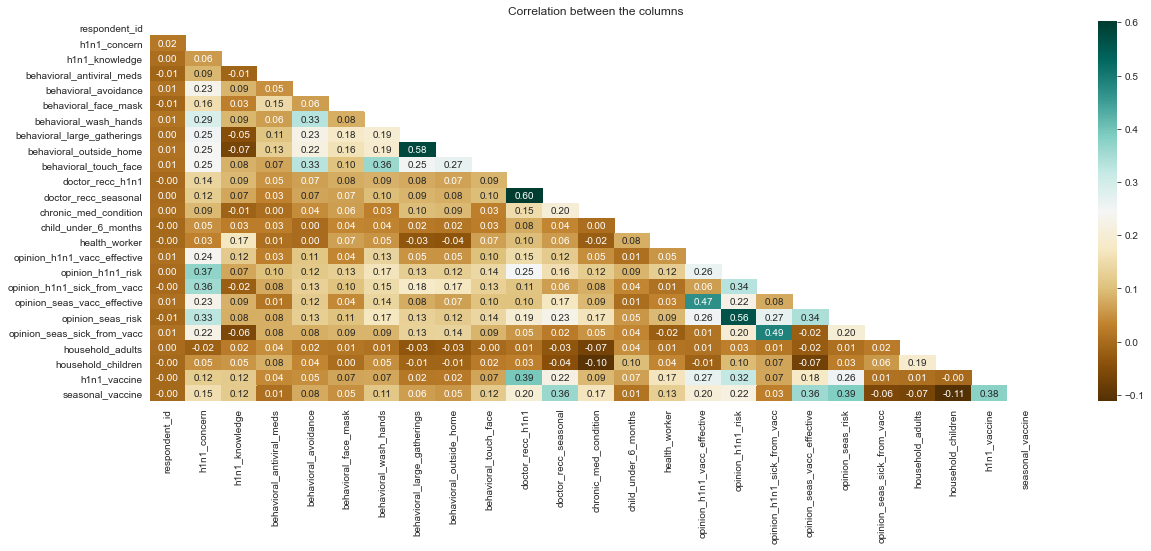

In [53]:
#correlation heatmap
plt.figure(figsize=(20,7))
mask = np.triu(np.ones_like(combined_data.corr(), dtype=bool))
sns.heatmap(combined_data.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

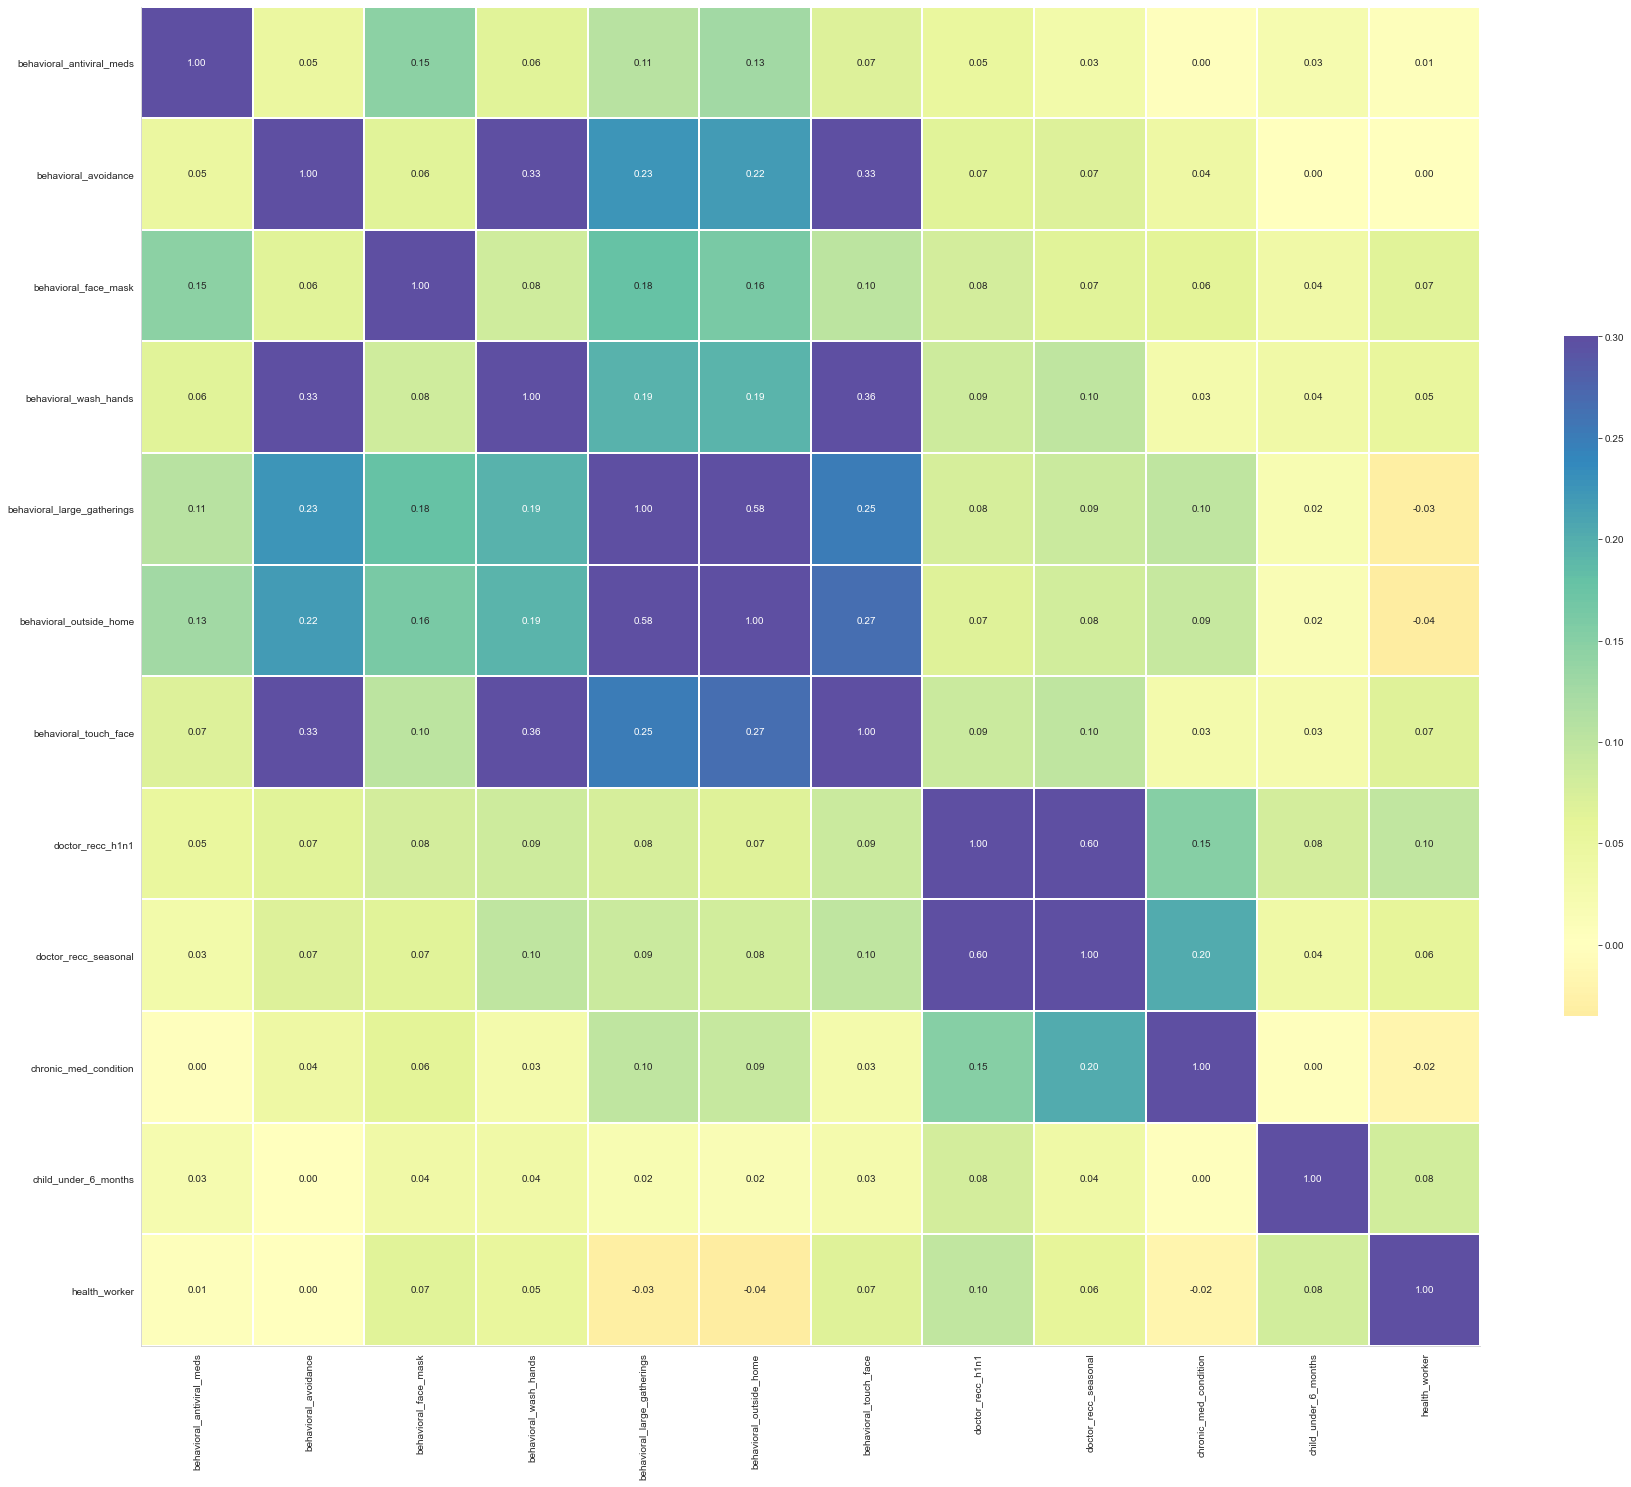

In [54]:
# Select relevant columns for correlation analysis
columns_of_interest = [
    'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
    'chronic_med_condition', 'child_under_6_months', 'health_worker'
]

# Create a correlation matrix
correlation_matrix = combined_data[columns_of_interest].corr()

# Plot the correlation matrix heatmap
heatmap = sns.heatmap(correlation_matrix, vmax=.3, center=0,
                      square=True, linewidths=1, cbar_kws={"shrink": .5},
                      annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
heatmap.figure.set_size_inches(30, 25)

>Observations
>>The behavioral patterns exhibited by individuals showed a strong positive correlation with their likelihood of getting vaccinated.

>>Notably, there was a high positive correlation between the opinions about doctor recommendations for vaccines and the actual vaccination status.

>>In general, the features in the dataset exhibited positive correlations with the decision to get vaccinated, with only a few exceptions.

It is required that we create a new dataset for Modelling by using the features we identified in The EDA process

In [55]:
# Creating a new dataset for modelling

columns_to_select = ["age_group", "education", "race", "sex", "employment_status",
                      "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_seas_vacc_effective",
                      "opinion_h1n1_sick_from_vacc", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
                      "behavioral_antiviral_meds", "behavioral_face_mask", "behavioral_wash_hands",
                      "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face",
                      "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition", "child_under_6_months",
                      "health_worker"]

model_data = combined_data.loc[:, columns_to_select]

In [56]:
# Checking the newly created Modelling dataset
model_data.head(10)

,age_group,education,race,sex,employment_status,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker
0,55 - 64 Years,< 12 Years,White,Female,Not in Labor Force,3.0,1.0,2.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35 - 44 Years,12 Years,White,Male,Employed,5.0,4.0,4.0,4.0,2.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18 - 34 Years,College Graduate,White,Male,Employed,3.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,65+ Years,12 Years,White,Female,Not in Labor Force,3.0,3.0,5.0,5.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,45 - 54 Years,Some College,White,Female,Employed,3.0,3.0,3.0,2.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,65+ Years,12 Years,White,Male,Employed,5.0,2.0,5.0,1.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,55 - 64 Years,< 12 Years,White,Male,Employed,4.0,1.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,45 - 54 Years,Some College,White,Female,Employed,5.0,2.0,4.0,1.0,2.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8,45 - 54 Years,College Graduate,White,Male,Employed,4.0,1.0,4.0,1.0,2.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,55 - 64 Years,12 Years,White,Male,Not in Labor Force,4.0,2.0,4.0,2.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


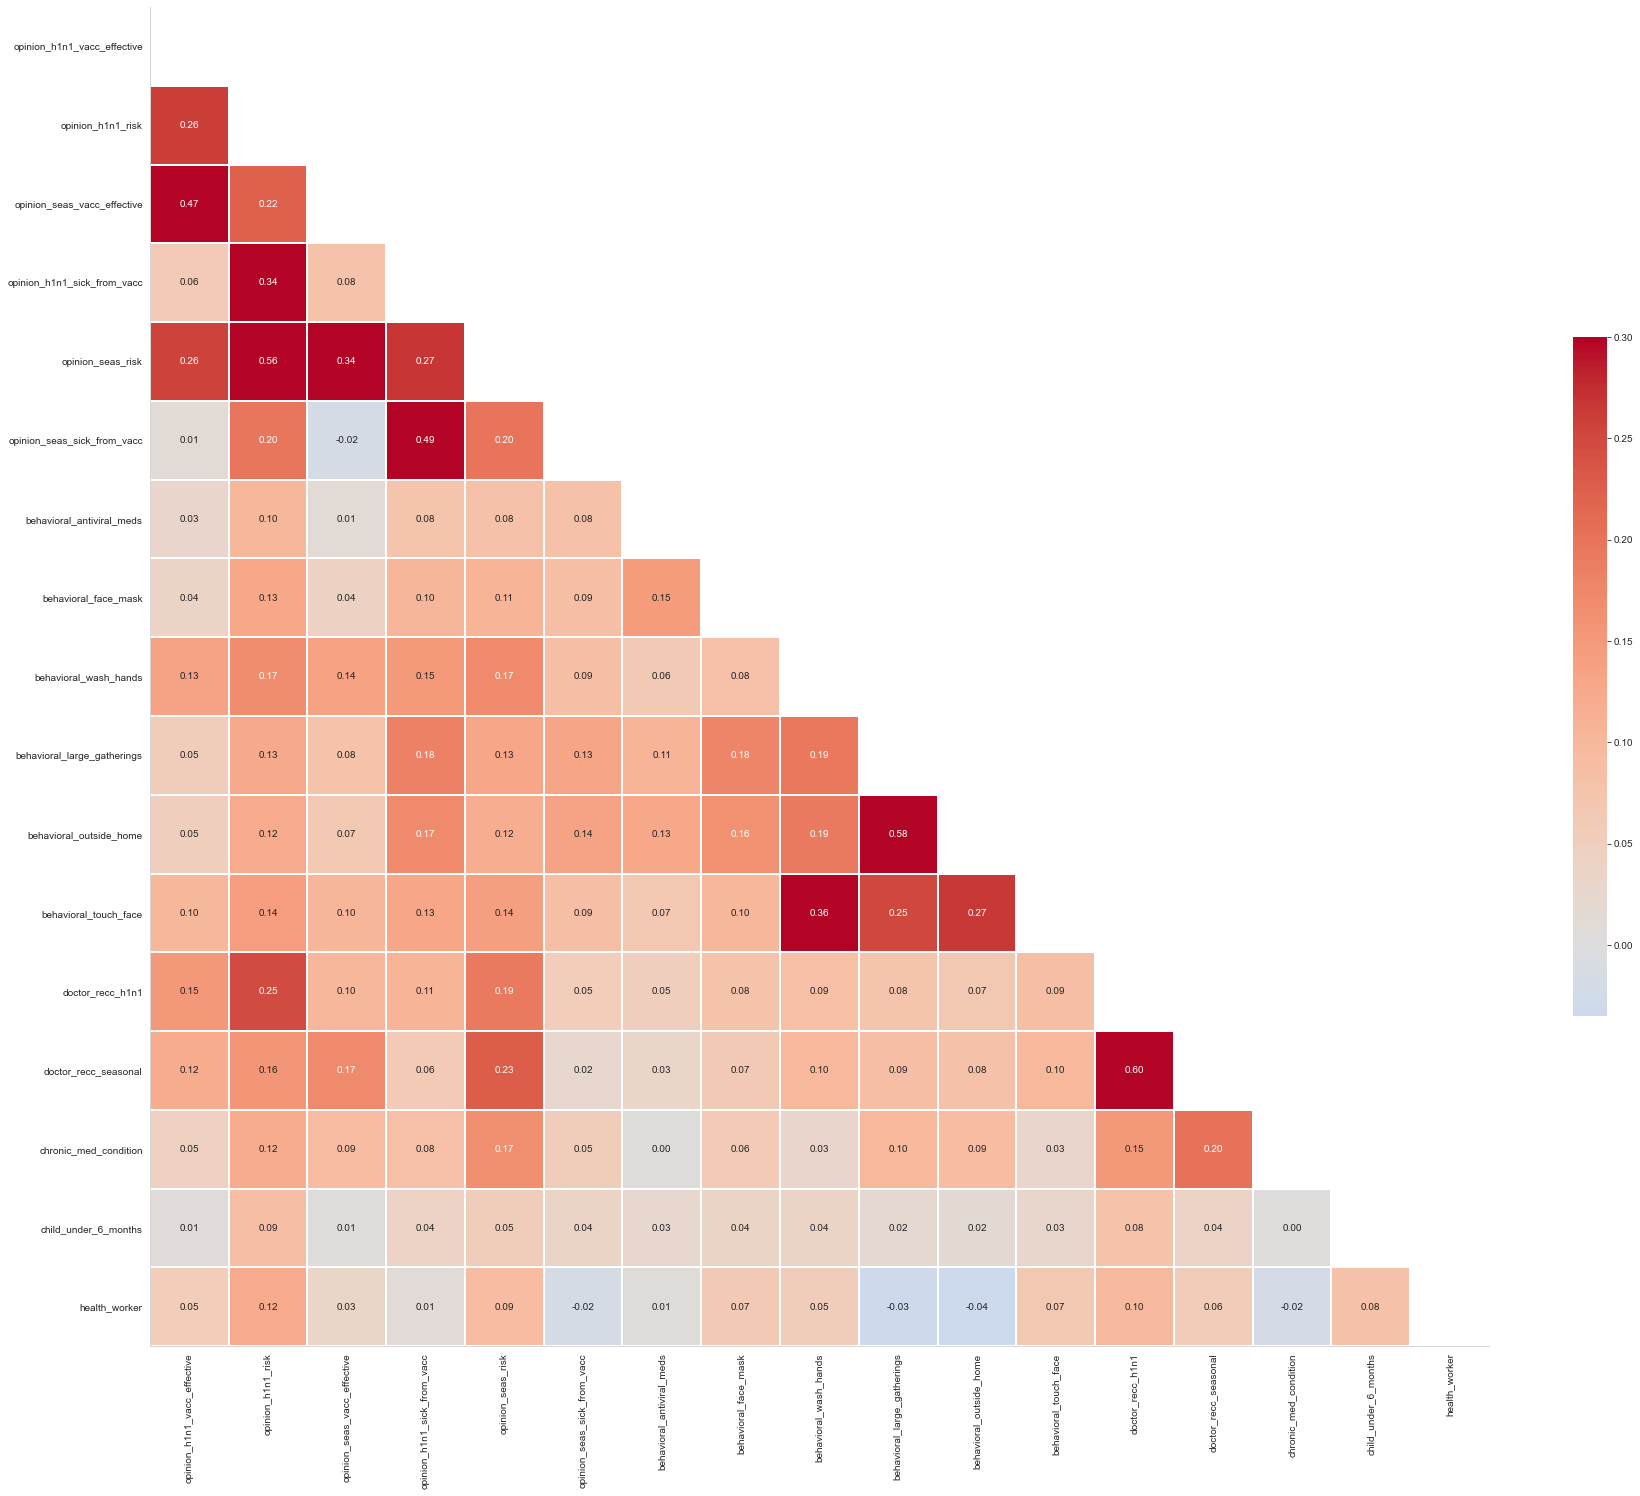

In [57]:
from plotly.figure_factory._annotated_heatmap import np


def plot_correlation_heatmap(dataframe):
    # Identify and drop constant columns
    constant_columns = dataframe.columns[dataframe.nunique() == 1]
    dataframe_filtered = dataframe.drop(columns=constant_columns)

    corr = dataframe_filtered.corr()

    # Create a mask to hide missing values
    mask = np.triu(np.ones_like(corr, dtype=bool))

    g = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')

    sns.despine()
    g.figure.set_size_inches(30, 25)
    plt.show()

# Use the function with your DataFrame
plot_correlation_heatmap(model_data)

Feature Selection and Engineering
from the previous EDA process we saw how different behaviors influence vaccine intake, therefore we will create a new behavior features as a combined column to improve readability and performance

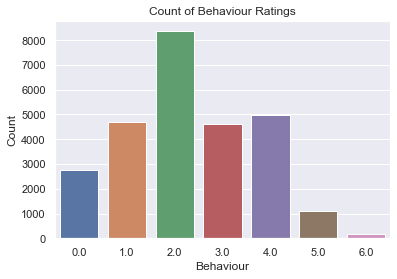

In [58]:
# Sum the behavioral columns and create a new 'Behaviour' column
model_data['Behaviour'] = model_data.filter(like='behavioral').sum(axis=1)

# Set a darkgrid style
sns.set(style="darkgrid")

# Create a countplot
sns.countplot(x='Behaviour', data=model_data)

# Set labels and title
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('Count of Behaviour Ratings')

# Show the plot
plt.show()

Categorical Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

model_data1 = pd.concat([
    model_data[['age_group', 'race', 'sex', 'employment_status', 'education']].apply(lambda col: LabelEncoder().fit_transform(col)),
    model_data.drop(columns=['age_group', 'race', 'sex', 'employment_status', 'education'])
], axis=1)

model_data1.head(10)

,age_group,race,sex,employment_status,education,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,Behaviour
0,3,3,0,1,1,3.0,1.0,2.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1,3,1,0,0,5.0,4.0,4.0,4.0,2.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0,3,1,0,2,3.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,3,0,1,0,3.0,3.0,5.0,5.0,4.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
4,2,3,0,0,3,3.0,3.0,3.0,2.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
5,4,3,1,0,0,5.0,2.0,5.0,1.0,4.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
6,3,3,1,0,1,4.0,1.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2,3,0,0,3,5.0,2.0,4.0,1.0,2.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
8,2,3,1,0,2,4.0,1.0,4.0,1.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
9,3,3,1,1,0,4.0,2.0,4.0,2.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0


Modelling
Preparing features (X) and Target Labels (y) for Vaccine Uptake Prediction

In [60]:
# Feature Preparation 
X = model_data1
y = combined_data[['h1n1_vaccine', 'seasonal_vaccine']]

In [61]:
# Splitting Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) 
X_train.head(10)

,age_group,race,sex,employment_status,education,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,Behaviour
22191,4,3,1,1,2,4.0,2.0,5.0,2.0,4.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
1351,3,3,0,0,3,5.0,4.0,5.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25293,4,1,0,1,2,4.0,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
16249,3,3,1,1,1,5.0,1.0,4.0,2.0,4.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
3219,2,3,0,0,1,5.0,2.0,4.0,2.0,4.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
17807,3,3,0,1,2,3.0,2.0,4.0,4.0,2.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
25937,3,3,1,0,1,3.0,1.0,2.0,5.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20031,0,3,0,1,2,5.0,4.0,5.0,1.0,4.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
15652,4,3,1,0,0,4.0,1.0,4.0,2.0,4.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
22781,3,3,1,1,2,4.0,4.0,4.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [62]:
X_test.head(10)

,age_group,race,sex,employment_status,education,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,Behaviour
20785,0,0,0,1,3,4.0,2.0,4.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0
18587,4,1,0,1,3,4.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2666,4,0,0,1,3,1.0,1.0,5.0,1.0,5.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4574,2,3,0,0,2,5.0,2.0,4.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3391,2,3,0,0,2,4.0,2.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7291,2,3,0,1,1,5.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
16978,1,3,1,0,2,5.0,4.0,5.0,4.0,4.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
21658,0,3,1,0,3,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23094,0,2,0,0,0,3.0,1.0,4.0,4.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
13342,3,1,0,0,1,5.0,5.0,5.0,4.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [63]:
y_train.head(10)

,h1n1_vaccine,seasonal_vaccine
22191,0,1
1351,1,1
25293,0,0
16249,0,0
3219,0,1
17807,0,1
25937,0,0
20031,0,1
15652,1,1
22781,0,0


In [64]:
y_test.head(10)

,h1n1_vaccine,seasonal_vaccine
20785,1,1
18587,0,0
2666,0,1
4574,1,0
3391,0,0
7291,0,0
16978,1,1
21658,1,1
23094,0,0
13342,0,0


Scaling The Model

In [65]:
scaler = MinMaxScaler() # instance of minmax scaler

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Model Evaluation
1. Decision Trees
2. Random Forest
3. Naive Bayes
4. KNN

We will write a code that will compare the performance of different classifiers using the two target variables.

In [66]:
# Create a list of classifiers using different cross validation
classifiers = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RandomForestClassifier()]

# Define the names of the columns corresponding to the target variables
column_names = ["h1n1_vaccine", "seasonal_vaccine"]

# Initialize lists to store results for each classifier and each column
results = []

# Iterate over each classifier
for classifier in classifiers:
    # Initialize lists to store results for each column
    y_pred_list = []
    avg_recall_list = []
    avg_precision_list = []
    avg_accuracy_list = [[] for _ in range(len(column_names))]  # Accuracy scores for each column

    # Iterate over each column of y_train
    for i, column_name in enumerate(column_names):
        # Select the i-th column as the target variable
        y_train_selected = y_train[column_name]

        # Perform cross-validation prediction
        y_pred = cross_val_predict(classifier, X_train, y_train_selected, cv=5)

        # Calculate evaluation metrics
        avg_recall = recall_score(y_train_selected, y_pred, average='weighted')
        avg_precision = precision_score(y_train_selected, y_pred, average='weighted')
        avg_accuracy = accuracy_score(y_train_selected, y_pred)

        # Append results to the respective lists
        y_pred_list.append(y_pred)
        avg_recall_list.append(avg_recall)
        avg_precision_list.append(avg_precision)
        avg_accuracy_list[i].append(avg_accuracy)

    # Append results for the current classifier to the overall results list
    results.append((classifier, y_pred_list, avg_recall_list, avg_precision_list, avg_accuracy_list))

# Print the results for each classifier and each column
for classifier, y_pred_list, avg_recall_list, avg_precision_list, avg_accuracy_list in results:
    classifier_name = type(classifier).__name__
    print(f"Results for classifier: {classifier_name}")
    print("-----------------------------")
    for i, column_name in enumerate(column_names):
        print(f"Results for {column_name}:")
        print("----------------------------")
        print("Predicted labels:", y_pred_list[i])
        print("Average Recall:", avg_recall_list[i])
        print("Average Precision:", avg_precision_list[i])
        print(f"Average Accuracy: {sum(avg_accuracy_list[i]) / len(avg_accuracy_list[i])}")
        print("\n")

Results for classifier: LogisticRegression
-----------------------------
Results for h1n1_vaccine:
----------------------------
Predicted labels: [0 1 0 ... 0 0 0]
Average Recall: 0.834963725719635
Average Precision: 0.8206203202506742
Average Accuracy: 0.834963725719635


Results for seasonal_vaccine:
----------------------------
Predicted labels: [1 1 0 ... 1 1 0]
Average Recall: 0.7733676573835713
Average Precision: 0.7732478287459427
Average Accuracy: 0.7733676573835713


Results for classifier: DecisionTreeClassifier
-----------------------------
Results for h1n1_vaccine:
----------------------------
Predicted labels: [0 1 0 ... 0 1 0]
Average Recall: 0.7528668382869178
Average Precision: 0.7589143847706858
Average Accuracy: 0.7528668382869178


Results for seasonal_vaccine:
----------------------------
Predicted labels: [1 1 0 ... 1 1 0]
Average Recall: 0.6741399485139247
Average Precision: 0.6739808915510739
Average Accuracy: 0.6741399485139247


Results for classifier: KNeighbo

In [67]:
# Create a list of classifiers using different cross validation
classifiers = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RandomForestClassifier()]

# Define the names of the columns corresponding to the target variables
column_names = ["h1n1_vaccine", "seasonal_vaccine"]

# Initialize lists to store accuracy scores for each classifier and each column
accuracy_scores = []

# Iterate over each classifier
for classifier in classifiers:
    # Initialize lists to store accuracy scores for each column
    avg_accuracy_list = []

    # Iterate over each column of y_train
    for i, column_name in enumerate(column_names):
        # Select the i-th column as the target variable
        y_train_selected = y_train[column_name]

        # Perform cross-validation prediction
        y_pred = cross_val_predict(classifier, X_train, y_train_selected, cv=5)

        # Calculate accuracy and append to the list
        avg_accuracy = accuracy_score(y_train_selected, y_pred)
        avg_accuracy_list.append(avg_accuracy)

    # Append accuracy scores for the current classifier to the overall list
    accuracy_scores.append((type(classifier).__name__, avg_accuracy_list))

# Print the accuracy scores for each classifier and each column
for classifier_name, avg_accuracy_list in accuracy_scores:
    print(f"Accuracy scores for classifier: {classifier_name}")
    print("-----------------------------")
    for i, column_name in enumerate(column_names):
        print(f"Accuracy for {column_name}: {avg_accuracy_list[i]}")
    print("\n")

Accuracy scores for classifier: LogisticRegression
-----------------------------
Accuracy for h1n1_vaccine: 0.834963725719635
Accuracy for seasonal_vaccine: 0.7733676573835713


Accuracy scores for classifier: DecisionTreeClassifier
-----------------------------
Accuracy for h1n1_vaccine: 0.7527732272408144
Accuracy for seasonal_vaccine: 0.6742803650830798


Accuracy scores for classifier: KNeighborsClassifier
-----------------------------
Accuracy for h1n1_vaccine: 0.8095951322256026
Accuracy for seasonal_vaccine: 0.7261408846243856


Accuracy scores for classifier: GaussianNB
-----------------------------
Accuracy for h1n1_vaccine: 0.774912239644278
Accuracy for seasonal_vaccine: 0.7258132459630237


Accuracy scores for classifier: RandomForestClassifier
-----------------------------
Accuracy for h1n1_vaccine: 0.8283641469693424
Accuracy for seasonal_vaccine: 0.7605897495904517




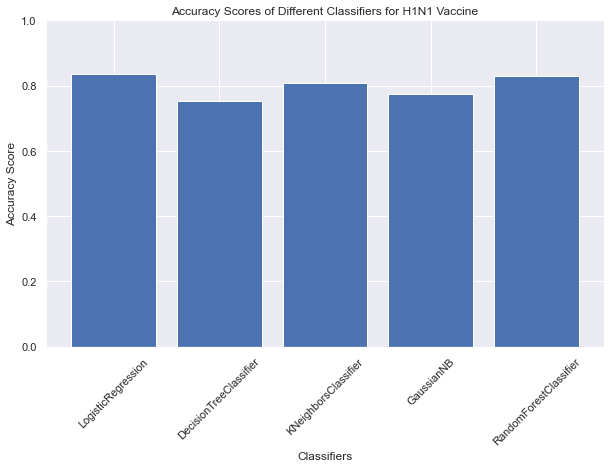

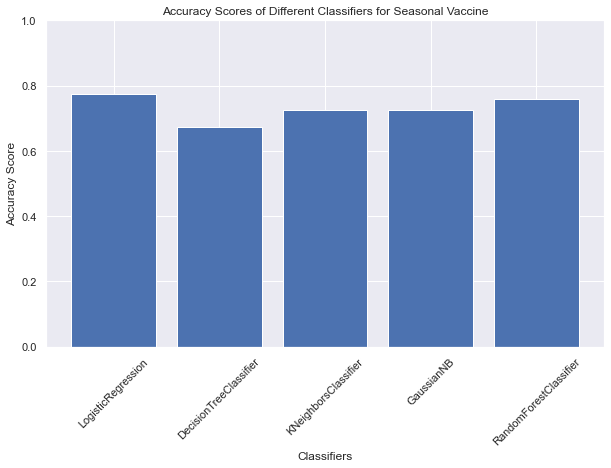

In [68]:
# Assuming you have the accuracy_scores list from the previous code snippet

# Extract accuracy scores for H1N1 vaccine and seasonal vaccine
h1n1_accuracy_scores = [scores[1][0] for scores in accuracy_scores]  # Assumes H1N1 is the first column
seasonal_accuracy_scores = [scores[1][1] for scores in accuracy_scores]  # Assumes seasonal is the second column

# Plot the accuracy scores for H1N1 vaccine
h1n1_labels = [classifier_name for classifier_name, _ in accuracy_scores]
plt.figure(figsize=(10, 6))
plt.bar(h1n1_labels, h1n1_accuracy_scores)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers for H1N1 Vaccine')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()

# Plot the accuracy scores for seasonal vaccine
seasonal_labels = [classifier_name for classifier_name, _ in accuracy_scores]
plt.figure(figsize=(10, 6))
plt.bar(seasonal_labels, seasonal_accuracy_scores)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers for Seasonal Vaccine')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()


>Observations
1. Logistic Regression generally performs well, achieving high accuracy, recall, and precision for both vaccines.
2. K-Nearest Neighbors and Gaussian Naive Bayes show reasonable performance but are slightly less accurate.
3. Decision Tree Classifier has slightly lower performance compared to Logistic Regression.
Random Forest Classifier performs well, showing similar performance to Logistic Regression.

Performance Evaluation of Various Classifiers on the Training Dataset

In [69]:
# Function to fit models with training data
def fit_models(X_train, y_train, classifiers):
    for classifier, _, _, _, _ in classifiers:
        for i, column_name in enumerate(column_names):
            classifier.fit(X_train, y_train.iloc[:, i])

# Function to evaluate models on the test set
def evaluate_models(X_test, y_test, classifiers, column_names):
    for classifier, _, _, _, _ in classifiers:
        classifier_name = type(classifier).__name__
        print(f"Evaluating classifier: {classifier_name} on the test set")
        print("-----------------------------")
        
        for i, column_name in enumerate(column_names):
            print(f"Evaluating {column_name}:")
            print("----------------------------")
            
            y_pred_test = classifier.predict(X_test)
            avg_recall_test = recall_score(y_test.iloc[:, i], y_pred_test, average='weighted')
            avg_precision_test = precision_score(y_test.iloc[:, i], y_pred_test, average='weighted')
            avg_accuracy_test = accuracy_score(y_test.iloc[:, i], y_pred_test)
            
            print("Predicted labels:", y_pred_test)
            print("Average Recall on Test Set:", avg_recall_test)
            print("Average Precision on Test Set:", avg_precision_test)
            print("Average Accuracy on Test Set:", avg_accuracy_test)
            print("\n")

# Fit models with training data
fit_models(X_train, y_train, results)

# Evaluate models on the test set
evaluate_models(X_test, y_test, results, column_names)

Evaluating classifier: LogisticRegression on the test set
-----------------------------
Evaluating h1n1_vaccine:
----------------------------
Predicted labels: [1 0 1 ... 1 1 1]
Average Recall on Test Set: 0.6447023586671659
Average Precision on Test Set: 0.7688526932769829
Average Accuracy on Test Set: 0.6447023586671659


Evaluating seasonal_vaccine:
----------------------------
Predicted labels: [1 0 1 ... 1 1 1]
Average Recall on Test Set: 0.7675028079371022
Average Precision on Test Set: 0.7676637947866114
Average Accuracy on Test Set: 0.7675028079371022


Evaluating classifier: DecisionTreeClassifier on the test set
-----------------------------
Evaluating h1n1_vaccine:
----------------------------
Predicted labels: [1 0 1 ... 1 1 1]
Average Recall on Test Set: 0.5891052040434295
Average Precision on Test Set: 0.7340948523951716
Average Accuracy on Test Set: 0.5891052040434295


Evaluating seasonal_vaccine:
----------------------------
Predicted labels: [1 0 1 ... 1 1 1]
Average 

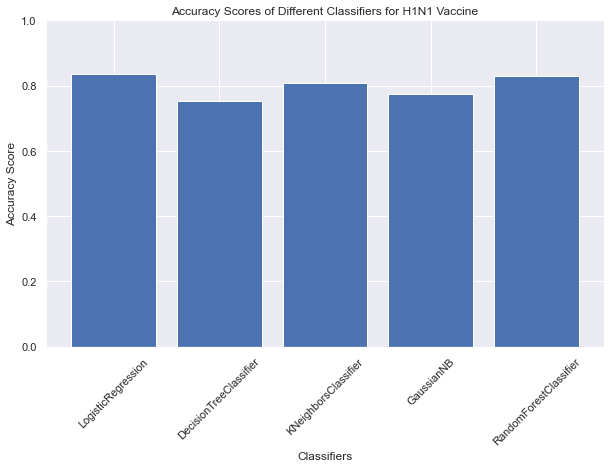

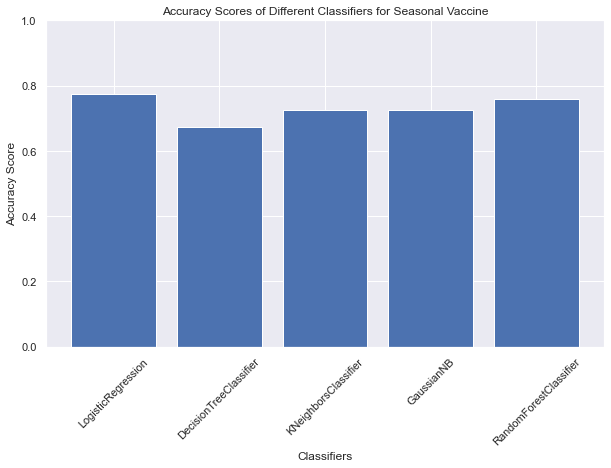

In [70]:
# Plotting the Visualizations based on the classifier evaluations
# Plot the accuracy scores for H1N1 vaccine
h1n1_labels = [type(classifier).__name__ for classifier in classifiers]
plt.figure(figsize=(10, 6))
plt.bar(h1n1_labels, h1n1_accuracy_scores)  # Removed quotation marks
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers for H1N1 Vaccine')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()

# Plot the accuracy scores for seasonal vaccine
seasonal_labels = [type(classifier).__name__ for classifier in classifiers]
plt.figure(figsize=(10, 6))
plt.bar(seasonal_labels, seasonal_accuracy_scores)  # Removed quotation marks
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers for Seasonal Vaccine')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()

ROC-Curve and AUC implementation
The use of ROC and AUC will enable us to pick the best model in our case

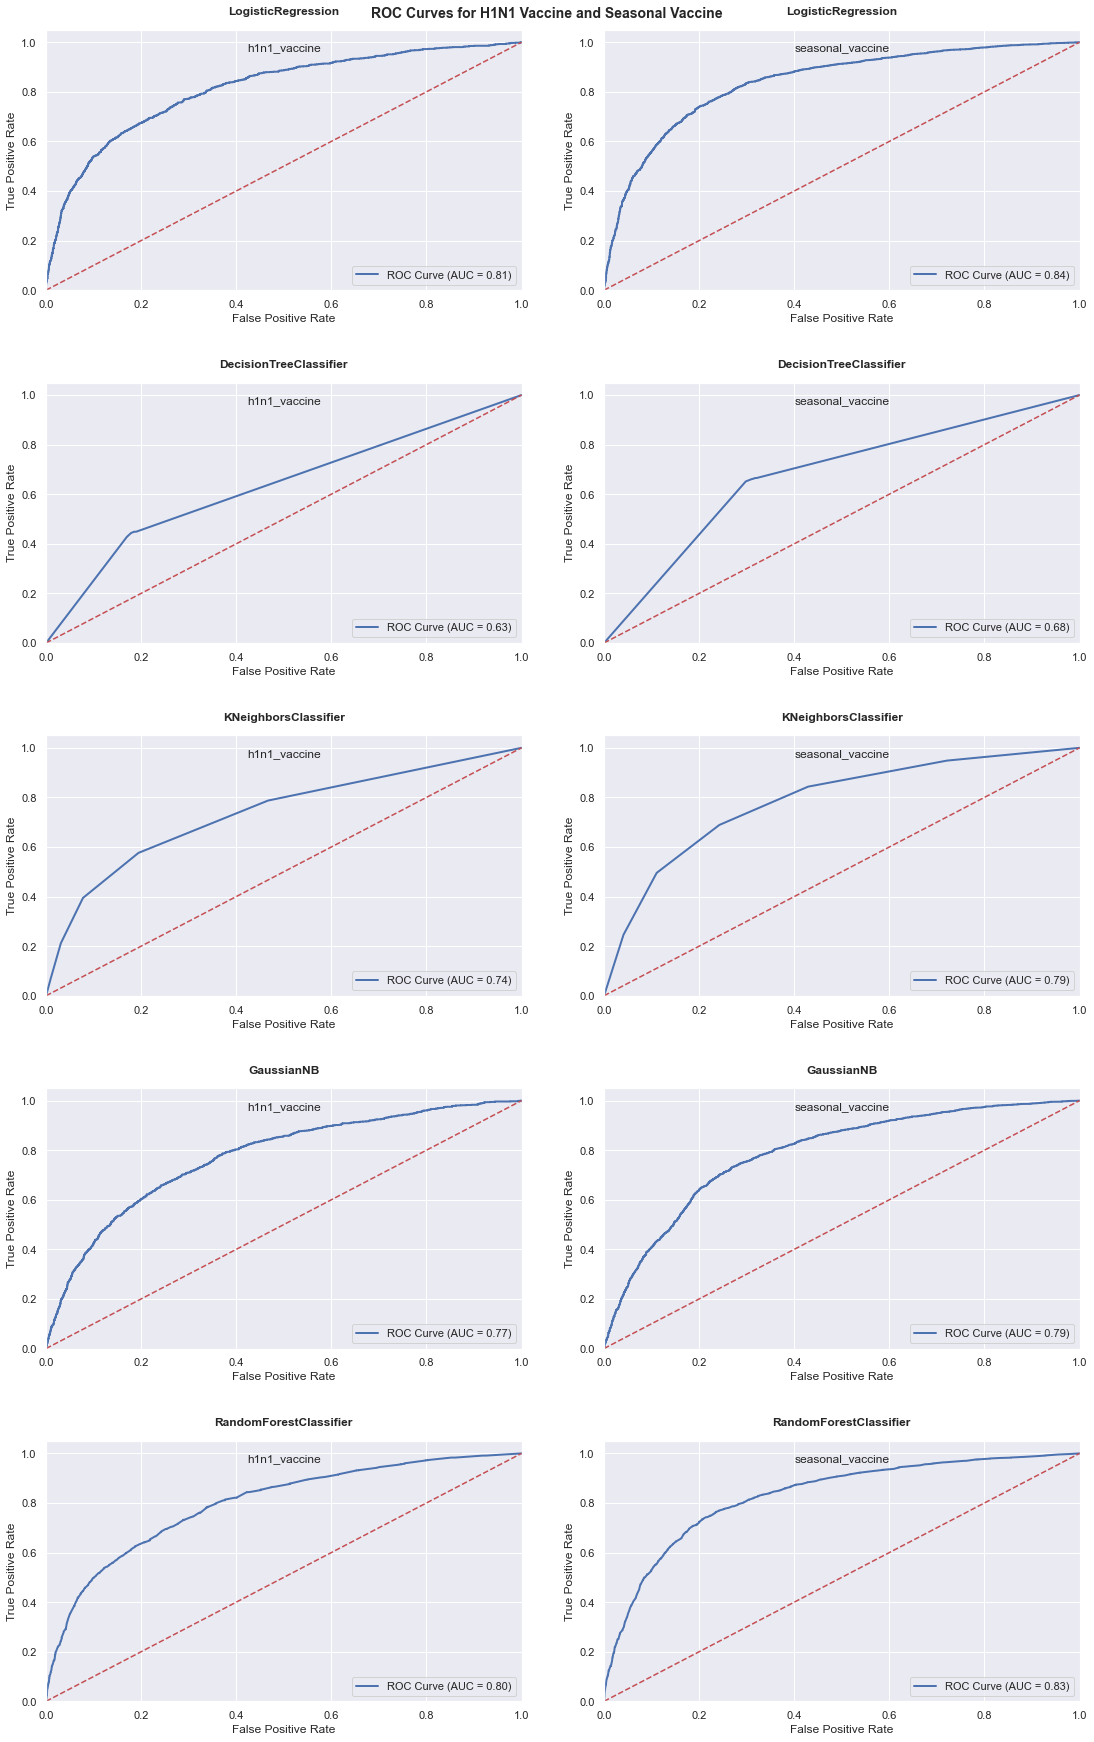

In [71]:
# Create the figure and subplots with the desired size
fig, axs = plt.subplots(nrows=len(classifiers), ncols=2, figsize=(16, 25))

# Adjust the aspect ratio of each subplot
for ax in axs.flat:
    ax.set_aspect('auto')

# Iterate over each classifier
for idx, classifier in enumerate(classifiers):
    classifier_name = type(classifier).__name__
    
    # Iterate over columns 1 and 2
    for col in [0, 1]:
        # Select the column as the target variable
        y_train_selected = y_train.iloc[:, col]
        y_test_selected = y_test.iloc[:, col]

        # Fit the classifier
        classifier.fit(X_train, y_train_selected)

        # Predict the probabilities for the positive class
        y_pred_prob = classifier.predict_proba(X_test)[:, 1]

        # Compute the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_selected, y_pred_prob)

        # Compute the AUC
        auc = roc_auc_score(y_test_selected, y_pred_prob)

        # Set the subplot location
        ax = axs[idx, col]

        # Plot the ROC curve with larger line width
        ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', linewidth=2, color='b')
        ax.plot([0, 1], [0, 1], 'k--', color='r')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        
        # Set the title as the classifier name
        ax.set_title(classifier_name, fontsize=12, fontweight='bold', pad=15)
        
        # Add the column name at the top of the subplot
        ax.text(0.5, 0.95, column_names[col], transform=ax.transAxes, ha='center', va='top')

        # Add the legend
        ax.legend(loc='lower right')

# Adjust the subplot layout
plt.tight_layout(pad=3)

# Add a title to the entire figure
fig.suptitle('ROC Curves for H1N1 Vaccine and Seasonal Vaccine', fontsize=14, fontweight='bold')

# Display the plot
plt.show()

>Observation and Model Evaluation
1. Performance of Logistic Regression: [Seasonal Vaccine - ROC Score: 84%] [H1N1 Vaccine-ROC Score: 81%]

2. Performance of Random Forest Classifier: [H1N1 Vaccine:ROC Score: 80%] [Seasonal Vaccine - ROC Score: 83%]

>Baseline Model: Logistic Regression served as the baseline model.

>Decision: Despite having slightly lower ROC scores, Random Forest Classifier was chosen over Logistic Regression.

>Reasoning: RandomForest achieved a ROC score of 83% for the Seasonal Vaccine, which was deemed satisfactory. It seems that this model performed well across both vaccines, and the decision might also consider other factors like model complexity, interpretability, and computational efficiency.

Optimizing Model Parameters

In [72]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize a list to store the best models for each column
best_models = []

# Perform Grid Search and evaluation for each column
for i in range(y_train.shape[1]):
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    y_train_selected = np.array(y_train)[:, i]

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train_selected)

    # Get the best model
    best_rf_model = grid_search.best_estimator_
    best_models.append(best_rf_model)

    # Print the best hyperparameters
    print(f"Best Hyperparameters for column {i+1}:", grid_search.best_params_)

    # Evaluate the model on the test data
    test_accuracy = best_rf_model.score(X_test, np.array(y_test)[:, i])
    print(f"Test Accuracy for column {i+1}:", test_accuracy)

# Compute the average test accuracy
average_test_accuracy = np.mean([best_model.score(X_test, np.array(y_test)[:, i]) for i, best_model in enumerate(best_models)])
print("Average Test Accuracy:", average_test_accuracy)


Best Hyperparameters for column 1: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Test Accuracy for column 1: 0.8296518157993261
Best Hyperparameters for column 2: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Test Accuracy for column 2: 0.775739423436915
Average Test Accuracy: 0.8026956196181205


In [73]:
# Assuming you have your data and target variables: X_train, y_train
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Create and display a DataFrame with feature importances
importance_df = pd.DataFrame({'Feature': model_data1.columns, 'Importance': rf_model.feature_importances_})
print(importance_df.sort_values(by='Importance', ascending=False))

                        Feature  Importance
9             opinion_seas_risk    0.091737
0                     age_group    0.087871
7   opinion_seas_vacc_effective    0.080035
6             opinion_h1n1_risk    0.070622
5   opinion_h1n1_vacc_effective    0.063082
4                     education    0.061594
8   opinion_h1n1_sick_from_vacc    0.060594
18         doctor_recc_seasonal    0.058448
10  opinion_seas_sick_from_vacc    0.055549
17             doctor_recc_h1n1    0.055347
22                    Behaviour    0.052448
3             employment_status    0.035896
1                          race    0.035798
2                           sex    0.033211
19        chronic_med_condition    0.026301
21                health_worker    0.022817
14  behavioral_large_gatherings    0.020196
16        behavioral_touch_face    0.019940
15      behavioral_outside_home    0.019917
20         child_under_6_months    0.015138
13        behavioral_wash_hands    0.013437
12         behavioral_face_mask 

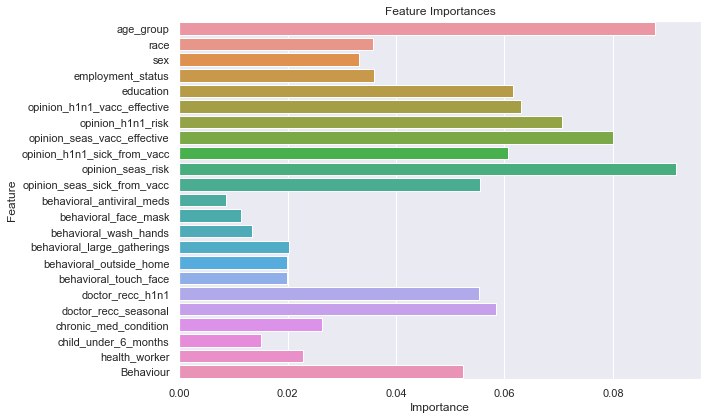

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Conclusion and Observations
The chart illustrates the impact of opinions, perceptions, and behavioral traits on vaccine uptake. The top four influential factors are:
1. Respondent's perception of seasonal flu risk without vaccine

2. Age group

3. Respondent's view on seasonal flu vaccine effectiveness

4. Respondent's perception of H1N1 risk

These factors play a crucial role in determining individuals' decisions regarding vaccine uptake.

Recommendations

1. Mass Sensitization: Invest in widespread awareness campaigns, led by healthcare professionals, to educate the public about the efficacy of H1N1 and seasonal flu vaccines and the risks associated with not getting vaccinated.
2. Collaboration and Partnerships: Foster partnerships with community organizations, schools, workplaces, and influencers to amplify vaccination promotion efforts. Engage trusted voices to build community trust and enhance vaccine acceptance.
3. Healthcare Provider Involvement: Encourage healthcare providers to actively recommend and administer vaccinations. Provide training and resources to enhance their knowledge and confidence in promoting vaccine uptake.